# Исследование продаж игр

# Вступление к проекту

Данный проект посвящен анализу данных о видеоиграх.

Цель проекта - выявить закономерности, определяющие успешность игры, что поможет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Краткий план исследования:
 - **Шаг 1**: Изучим общую информацию о данных. Откроем предоставленный файл данных и изучим его содержимое.
 - **Шаг 2**: Подготовим данные. Приведём названия столбцов к нижнему регистру, преобразуем данные в нужные типы и обработаем пропуски, если это необходимо. Обратим внимание на аббревиатуру ‘tbd’ в столбце с оценкой пользователей и определим, как её обработать. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
 - **Шаг 3**: Проведём исследовательский анализ данных. Изучим, сколько игр выпускалось в разные годы, как менялись продажи по платформам и какие платформы лидируют по продажам. Построим график “ящик с усами” по глобальным продажам игр в разбивке по платформам. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Посмотрим на общее распределение игр по жанрам.
 - **Шаг 4**: Составим портрет пользователя каждого региона. Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5) и самые популярные жанры (топ-5). Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.
 - **Шаг 5**: Проверим гипотезы. Проверим гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и что средние пользовательские рейтинги жанров Action и Sports разные.
 - **Шаг 6**: Напишем общий вывод. Подведём итоги нашего исследования и сформулируем выводы.
 - **Шаг 7**: Дадим рекомендации. На основании исследования данных, предоставим рекомендации касательно стоящих платформ, жанров, особенностей и рейтингов.


# Описание данных:
 - *Name* — название игры
 - *Platform* — платформа
 - *Year_of_Release* — год выпуска
 - *Genre* — жанр игры
 - *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
 - *EU_sales* — продажи в Европе (миллионы проданных копий)
 - *JP_sales* — продажи в Японии (миллионы проданных копий)
 - *Other_sales* — продажи в других странах (миллионы проданных копий)
 - *Critic_Score* — оценка критиков (максимум 100)
 - *User_Score* — оценка пользователей (максимум 10)
 - *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board*). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
# Загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import math
from scipy import stats as st
from scipy.stats import binom, poisson, norm

# Загрузка данных

In [2]:
# Загрузка датафрейма
try:
    df = pd.read_csv('datasets/games.csv') 
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv') 

In [3]:
# Функция выдачи информации о датафрейме
def df_information(df):
    print('\033[1m' + 'Общая информация о датафрейме' + '\033[0m')
    print(df.info())
    print()
    print('\033[1m' + 'Рандомные 10 строк датафрейма' + '\033[0m')
    pd.set_option('display.max_columns', None)
    display(df.sample(10))
    print('\033[1m' + 'Вывод статистики по датафрейму' + '\033[0m')
    display(df.describe())
    print('\033[1m' + 'Проверка датафрейма на наличие явных дубликатов. Их количество:' + '\033[0m')
    display(df.duplicated().sum())
    print()
    print('\033[1m' + 'Доля пропущенных значений среди всех данных:' + '\033[0m')
    display(df.isna().mean())
    print()
    print('\033[1m' + 'Количество пропущенных значений среди всех данных:' + '\033[0m')
    display(df.isnull().sum())

In [4]:
# Взглянем на информацию по столбцам

df_information(df)

Общая информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Рандомные 10 строк датафрейма


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2946,The LEGO Movie Videogame,3DS,2014.0,Action,0.28,0.31,0.05,0.05,NaN,5.4,E10+
8966,Mad Dash Racing,XB,2001.0,Racing,0.11,0.03,0.00,0.01,65.0,7.7,T
7338,The Bureau: XCOM Declassified,X360,2013.0,Shooter,0.10,0.10,0.00,0.02,68.0,6.7,M
7830,Quake,N64,1998.0,Shooter,0.15,0.04,0.00,0.00,NaN,NaN,NaN
8764,Enthusia Professional Racing,PS2,2005.0,Racing,0.07,0.06,0.00,0.02,70.0,7.6,E
4387,Mario Tennis Ultra Smash,WiiU,2015.0,Sports,0.13,0.15,0.14,0.02,58.0,5.3,E
8884,eJay Clubworld,PS2,NaN,Misc,0.07,0.06,0.00,0.02,69.0,8.6,E
7959,Little Battlers eXperience W,PSP,2012.0,Role-Playing,0.00,0.00,0.19,0.00,NaN,NaN,NaN
6654,Golden Nugget Casino,GBA,2004.0,Misc,0.18,0.07,0.00,0.00,NaN,tbd,E
12348,Sunrise Eiyuutan R,PS2,2000.0,Role-Playing,0.00,0.00,0.06,0.00,NaN,NaN,NaN


Вывод статистики по датафрейму


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Проверка датафрейма на наличие явных дубликатов. Их количество:


0


Доля пропущенных значений среди всех данных:


Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64


Количество пропущенных значений среди всех данных:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
# проверка неявных дубликатов
duplicates = df.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)
print('Количество неявных дубликатов:', duplicates.sum())

# вывод неявных дубликатов
if duplicates.sum() > 0:
    display(df[duplicates].sort_values(by=['Name', 'Platform', 'Year_of_Release']))


Количество неявных дубликатов: 4


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Выявлены 4 неявных дубликата. Следует удалить строки 16230 и 14244, поскольку в них не содержится информация ни по рейтингу ESRB, ни по продажам в регионах. Совершим повторную проверку на отсутствие строк.

In [6]:
df.drop(labels = [16230, 14244],axis = 0, inplace = True)

In [7]:
# проверка неявных дубликатов
duplicates = df.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)
print('Количество неявных дубликатов:', duplicates.sum())

# вывод неявных дубликатов
if duplicates.sum() > 0:
    display(df[duplicates].sort_values(by=['Name', 'Platform', 'Year_of_Release']))


Количество неявных дубликатов: 0


Столбцы датафрейма:

1. **Name** — наименование игры
2. **Platform** — издательская платформа 
3. **Year_of_Release** — год выпуска игры
4. **Genre** — жанр игры
5. **NA_sales** — продажи в Северной Америке в миллионах копий
6. **EU_sales** — продажи в Северной Америке в миллионах копий
7. **JP_sales** — продажи в Северной Америке в миллионах копий
8. **Other_sales** — продажи в других странах в миллионах копий.
9. **Critic_Score** — оценка критиков (максимум 100)
10. **User_Score** — оценка пользователей (максимум 10)
11. **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Вывод:

1. Первые буквы в столбцах датафрейма в верхнем регистре. Необходимо привести их в корректный регистр (нижний)
2. Проверка на наличие явных дубликатов в датафрейме не выявила ни одного.
3. Проверка на наличие пропущенных значений выявила некоторое количество пропущенных значений в 6 столбцах
4. Типы столбцов нужно привести в корректные
   
Общий итог:

Датафрейм выглядит не сильно загрязнённым. Предварительный анализ указал, что в данных присутствуют проблемы с пропусками, некорректными форматами столбцов и их названиями. Дубликатов не обнаружено.

# Предобработка данных

Порядок предобработки данных:

1. **Проверка на дубликаты:**
- Первым шагом стоит проверить, есть ли в данных дубликаты строк. Дубликаты могут исказить результаты анализа.
- *Дубликаты не обнаружены*

2. **Переименование столбцов**
- При правильном названии столбцов легче с ними взаимодействовать.

3. **Проверка на наличие пропусков:**
- Обратим внимание на пропущенные значения (NaN). Для этого можно использовать метод .isna() или .isnull(), чтобы найти пропуски в данных.

4. **Замена пропусков:**
 - Если есть пропущенные значения, необходимо решить, что с ними делать. Можно удалить строки с пропусками, заполнить их средними значениями или другими величинами.

5. **Изменение типов столбцов с данными:**
 - После обработки пропусков следует убедиться, что типы данных в столбцах соответствуют ожиданиям.

6. **Дополнительные шаги:**
 - В зависимости от результатов выполнить дополнительные действия.

## Названия столбцов

In [8]:
# создадим список из названий столбцов, приведем их в нижний регистр 

df.columns = df.columns.str.lower()

# просмотрим обновленную информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


## Проверка на наличие пропусков

In [9]:
# взглянем на наличие пропусков
df.isnull().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

### Наименование игры и жанр (name, genre)

In [10]:
# осмотрим пропуски связанные со столбцами name/genre, так как их минимальное количество

df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Мы выявили две строки, в которых отсутствуют значения в столбце 'name' и 'genre'.

Поскольку названия и жанры заменить какими-то средними значениями не получится, то стоит удалить эти строки, к тому же их всего 2 и на общий анализ данных такие действия не повлияют.

In [11]:
# удалим строки с отсутствующими значениями
df = df.dropna(subset = ['name'])

# проверим удаление
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

### Год выпуска (year_of_release)

In [12]:
# вернемся к строкам с с годом выпуска

df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Мы видим, что в названиях некоторых игр присутствует год - можем воспользоваться этой информацией и заменить значения в столбце `year_of_release`

In [13]:
# извлечем числа из строк
df['numeric_name'] = df['name'].str.extract(r'(\d{4})').astype(float)

# создадим отфильтрованную таблицу
df[(df['numeric_name'] > 0) & df['year_of_release'].isna()]['name'].count()


17

In [14]:
# всего 17 строк, где пропущенные в `year_of_release` и в имени есть год
# заменим пустые значения числами из 'numeric_name'
df['year_of_release'].fillna(df['numeric_name'], inplace=True)

# проверим на замену
df[(df['numeric_name'] > 0) & df['year_of_release'].isna()]['name'].count()

0

In [15]:
# удалим временный столбец 'numeric_name'
df.drop(columns=['numeric_name'], inplace=True)

# удалим оставшиеся строки без указания года выпуска
df = df.dropna(subset=['year_of_release'])

# проверим на наличие нулевых значений
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating             6682
dtype: int64

### Оценка критиков (critic_score)

Пропущенных значений достаточно много, чтобы отказаться от идей о замене значений на медианное/среднее по столбцам, или же полном удалении таких строк.

В данном случа нельзя найти какую-то логически справедливую идею о замене данных, поэтому предлагаю заменить значения таких строк на нейтральное значение, которое не повлияет на итоговый анализ данных. Например на значение `-1`

Такой же вывод можно применить и к столбцам `user_score` и `rating`

In [16]:
# заменим пропущенные значения на -1
df['critic_score'] = df['critic_score'].fillna(-1)

# проверим на наличие нулевых значений
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6610
rating             6682
dtype: int64

In [17]:
# взглянем на уникальные значения
df['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Тип столбца будет необходимо привести в тип uint8

### Оценка пользователей (user_score)

Сразу хочу обратить внимание на то, что столбец `user_score` является столбцом типа `object`, что может говорить о том, что в столбце находятся не только числовые значения. Выявим их.

In [18]:
df['user_score'].value_counts()

tbd    2378
7.8     322
8       285
8.2     277
8.3     252
       ... 
0.9       2
1.9       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Сразу замечаем значение `tbd` - to be determined - будет определено. Такие значения, как и пропущенные совсем нам не нужны. Заменим их на `-1` как и в столбце `critic_score`

In [19]:
# замена пропущенных значений на -1
df['user_score'] = df['user_score'].fillna(-1)

# замена `tbd` значений на -1
df['user_score'] = df['user_score'].replace('tbd', -1)

# проверим на наличие нулевых значений
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6682
dtype: int64

### Рейтинг ESRB (rating)

In [20]:
# изучим уникальные значения
df['rating'].value_counts()

E       3929
T       2905
M       1537
E10+    1394
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [21]:
# заменим пропущенные значения на 'n/a' - not available
df['rating'] = df['rating'].fillna('n/a')

# проверим на наличие нулевых значений
df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

## Типы столбцов

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  float64
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     16460 non-null  float64
 9   user_score       16460 non-null  object 
 10  rating           16460 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Проанализируем каждый из столбцов по очереди и определим, можно ли оптимизировать или откорректировать их типы:
1. **name**(`object`). Корректный тип столбца
2. **platform**(`object`). Корректный тип столбца
3. **year_of_release**(`float64`). Некорректный тип столбца, необходимо перевести в `uint16`.
4. **genre**(`object`). Корректный тип столбца
5. **na_sales**, **eu_sales**, **jp_sales**, **other_sales**(`float64`). Корректный тип столбца.
6. **critic_score**(`float64`). Некорректный тип столбца, необходимо перевести в `int8`.
7. **user_score**(`object`). Некорректный тип столбца, необходимо перевести в `float64`.
8. **rating**(`object`). Корректный тип столбца.

In [23]:
# years_of_release
df['year_of_release'] = df['year_of_release'].astype('uint16')

# critic_score
df['critic_score'] = df['critic_score'].astype('int8')

# user_score
df['user_score'] = df['user_score'].astype('float64')

# user_score critic_score умножение на 10 диаграмам рассеяния ###### УДАЛИТЬ ИЛИ ОСТАВИТЬ
df['user_score'] = df['user_score'] * 10

df['user_score'] = df['user_score'].astype('int16')


# проверим изменения
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  uint16 
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     16460 non-null  int8   
 9   user_score       16460 non-null  int16  
 10  rating           16460 non-null  object 
dtypes: float64(4), int16(1), int8(1), object(4), uint16(1)
memory usage: 1.2+ MB


Все типы столбцов откорректированы.

## Подсчет суммарных продаж во всех регионах

In [24]:
# создадим отдельный столбец с общей выручкой по всем регионам
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9755,Chase: Hollywood Stunt Driver,XB,2002,Racing,0.09,0.03,0.0,0.00,60,74,T,0.12
1690,LEGO Batman 2: DC Super Heroes,PS3,2012,Action,0.50,0.50,0.0,0.19,81,75,E10+,1.19
14712,Syberia II,XB,2004,Adventure,0.02,0.01,0.0,0.00,71,87,T,0.03
4604,Army Men: Sarge's Heroes 2,N64,2000,Shooter,0.34,0.07,0.0,0.00,-1,-10,n/a,0.41
15894,Davis Cup Tennis,GBA,2002,Sports,0.01,0.00,0.0,0.00,59,-10,E,0.01


## Вывод:

1. Явные дубликаты отсутствуют
2. Столбцы переименованы на значения в нижнем регистре
3. Удалены строки с пропусками в `genre` и `name`
4. Заменены годы выпуска игр в тех значениях, где в именах содержится год игры в столбце `year_of_release`
5. Пропуски возможно связаны с некорректной выгрузкой данных в .csv файл, либо же платформы издатели предоставляют информацию в разных форматах, что может привести к ошибке составления базы данных.
6. Заменены пропуски и `tbd` на числовые значения `-1` в столбце `user_score`
7. Заменены пропуски на числовые значения `-1` в столбце `critic_score`
8. Заменены пропуски на значения `n/a`
9. Исправлены типы столбцов на корректные в `year_of_release`, `critic_score`, `user_score`
10. Добавлен столбец `total_sales` с информацией об общих суммах продаж со всех регионов из датафрейма

In [25]:
# Комментарий ревьюера 0
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  uint16 
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     16460 non-null  int8   
 9   user_score       16460 non-null  int16  
 10  rating           16460 non-null  object 
 11  total_sales      16460 non-null  float64
dtypes: float64(5), int16(1), int8(1), object(4), uint16(1)
memory usage: 1.3+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'


# Исследовательский анализ данных

## Количество выпущенных игр за все года

In [26]:
# проверим уникальные значения
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983], dtype=uint16)

In [27]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-10,n/a,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-10,n/a,31.38


In [28]:
# создадим сводную таблицу, в которой индексами будут года, а значения количество проданных копий

amount_year = df.pivot_table(
    index='year_of_release',
    values='name',
    aggfunc=['count']
).sort_values(by='year_of_release', ascending=True)
amount_year.columns = ['amount']

# создадим сводную таблицу, в которой будут указаны года выпуска и количество выпущенных игр на каждой из платформ
dflist = df.pivot_table(
    index='year_of_release',
    values='name',
    columns='platform',
    aggfunc=['count']
).sort_values(by='year_of_release', ascending=True)
    
# заменим пропуски в таблице на нули
dflist = dflist.fillna(0)

# cычисление моды по каждому году
modes_counts = dflist.apply(lambda row: row.max(), axis=1)
modes_by_year = dflist.idxmax(axis=1)

# cоздание нового датафрейма с результатами
modes_df = pd.DataFrame({'mode_count': modes_counts,
                         'most_common_platform': modes_by_year.values})
modes_df['most_common_platform'] = modes_df['most_common_platform'].str[1]

# приведение в необходимый формат
modes_df['mode_count'] = modes_df['mode_count'].astype('uint16')


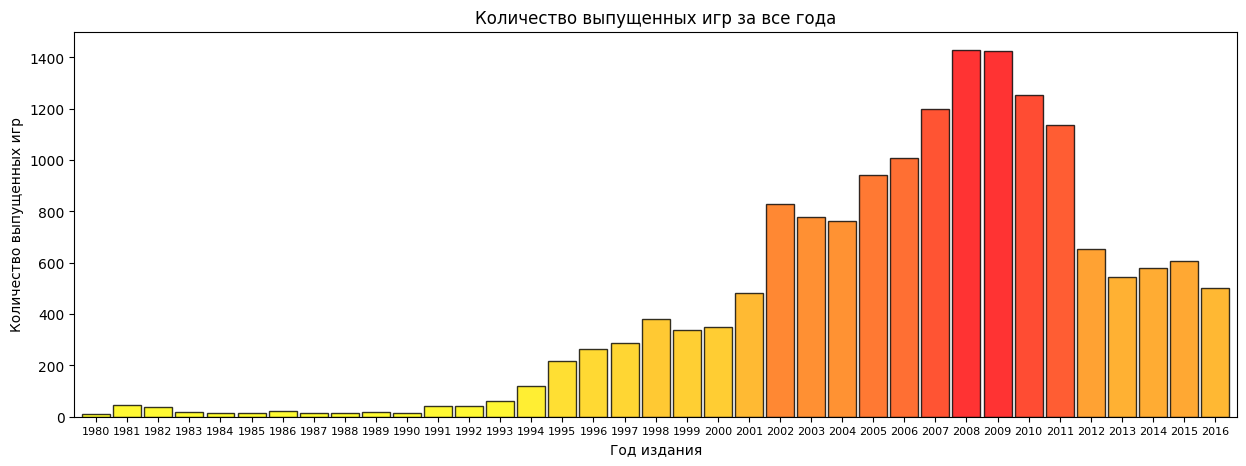

In [29]:
# создадим цветовую гамму
colors = plt.cm.autumn_r(amount_year['amount'] / max(amount_year['amount']))

# создадим гистограмму типа 'bar'
amount_year['amount'].plot(
    kind='bar',
    figsize=(15,5),
    width=0.9,
    color=colors,
    alpha=0.8,
    edgecolor='black'
)
plt.title('Количество выпущенных игр за все года')
plt.xlabel('Год издания')
plt.ylabel('Количество выпущенных игр')
plt.xticks(fontsize=8, rotation=0)
plt.show()

Вывод:

Столбчатая диаграмма количества выпущенных игр за все года показывает интересные данные.
 - До 1993 года количество выпускаемых игр в год не превышало 100 штук.
 - Первый серьезный прорыв начался в 1994-1995 годах, тогда количество выпускаемых игр увеличилось с 121 до 219.
 - С 1995 по 2000 года количество игр держалось в промежутке от 200 до 300 игр.
 - В 2002 году случился второй прорыв, который держался по 2004 год - количество игр возросло до 800 в год.
 - С 2005 по 2009 год резко увеличились появления игр на рынке. Каждый год их количество увеличивалось все сильнее и сильнее. Рекордные значения оказались на 2008 и 2009 годах - тогда вышло 1429 и 1427 игр.
 - С 2012 по 2016 год значения вернулись на старый уровень - количество игр стало в границах 500-600 в год. Можно сказать, что рынок откатился на 15 лет назад. 

## Продажи по платформам по годам

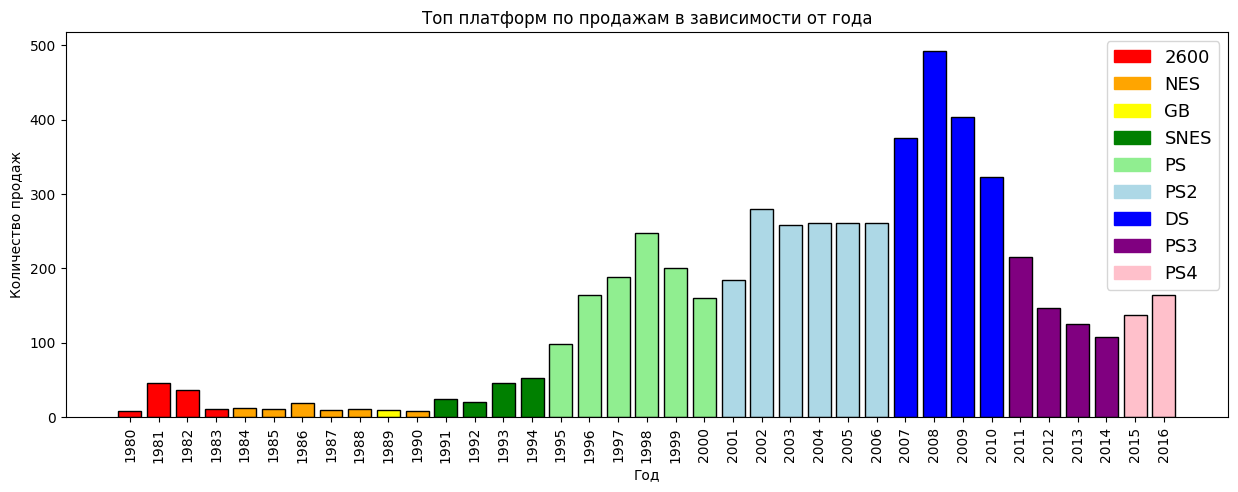

In [30]:
# Создаем словарь для цветов к каждой платформ
color_dict = {
    '2600': 'red', 
    'NES': 'orange', 
    'GB': 'yellow', 
    'SNES': 'green', 
    'PS': 'lightgreen', 
    'PS2': 'lightblue', 
    'DS': 'blue', 
    'PS3': 'purple', 
    'PS4': 'pink'
}

# Создаем столбчатую диаграмму
plt.figure(figsize=(15, 5))
plt.bar(modes_df.index,
        modes_df['mode_count'], 
        color=modes_df['most_common_platform'].map(color_dict),
        edgecolor='black',
)
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.title('Топ платформ по продажам в зависимости от года')
plt.xticks(modes_df.index, rotation=90)

# используем модуль matplotlib.patches для того, чтобы создать легенду с указанием каждого из цветов к платформе
plt.legend(handles=[mpatches.Patch(
    color=color, 
    label=platform,
) for platform, color in color_dict.items()], fontsize=13)
plt.show()

In [31]:
# выведем таблицу с модами и платформами, чтобы показать точные значения
modes_df

,mode_count,most_common_platform
year_of_release,,
1980,9,2600
1981,46,2600
1982,36,2600
1983,11,2600
1984,13,NES
1985,11,NES
1986,19,NES
1987,10,NES
1988,11,NES


Полученные данные говорят нам о том, что платформы захватывали первые позиции сменяя друг друга на протяжении всех лет. 
Больше всех лет планки лидерства держали NES, PS, PS2 - по 6 лет каждый. Явный лидер как компания PlayStation - в общей сложности PS являлся лидером на протяжении 18 лет!
Рассмотрим промежутки отдельно:

    - 1980 - 1983 - самая популярная платформа 2600
    - 1984 - 1990 - самая популярная платформа NES
    - 1991 - 1994 - самая популярная платформа SNES
    - 1995 - 2000 - самая популярная платформа PS. Заметно резкое увеличение по продажам в сравнении с предыдущими годами
    - 2001 - 2006 - самая популярная платформа - PS2. Уровень продаж находится примерно на том же уровне, что и при PS
    - 2007 - 2010 - самая популярная платформа - DS. Уровень продаж дошел до рекордного значения - 493 игры за год. Далее наблюдается спад.
    - 2011 - 2014 - самая популярная платформа - PS3.
    - 2015 - 2016 - самая популярная платформа - PS4.

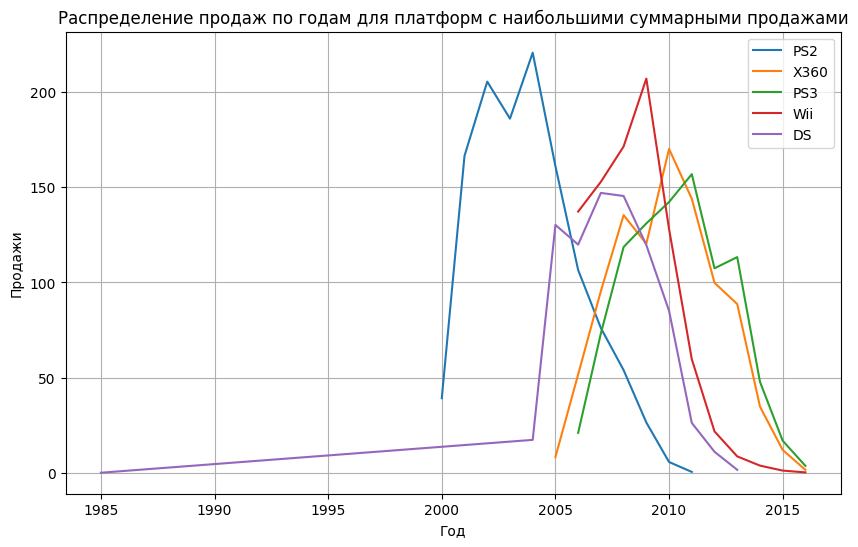

In [32]:
# Выбираем платформы с наибольшими суммарными продажами
top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(5).index

# Фильтруем данные по выбранным платформам
filtered_df = df[df['platform'].isin(top_platforms)]

# Создаем график
plt.figure(figsize=(10, 6))
for platform in top_platforms:
    platform_data = filtered_df[filtered_df['platform'] == platform]
    platform_data.groupby('year_of_release')['total_sales'].sum().plot(label=platform)

plt.title('Распределение продаж по годам для платформ с наибольшими суммарными продажами')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.legend()
plt.grid(True)
plt.show()

На визуализации распределения заметна проблема, связанная с платформой DS. Платформа Nintendo DS была выпщуена в 2004 году. Если в данных есть игры, выпущенные на платформе DS в 1985 году - то это ошибки, которые следует удалить, дабы не загрязнять данные.

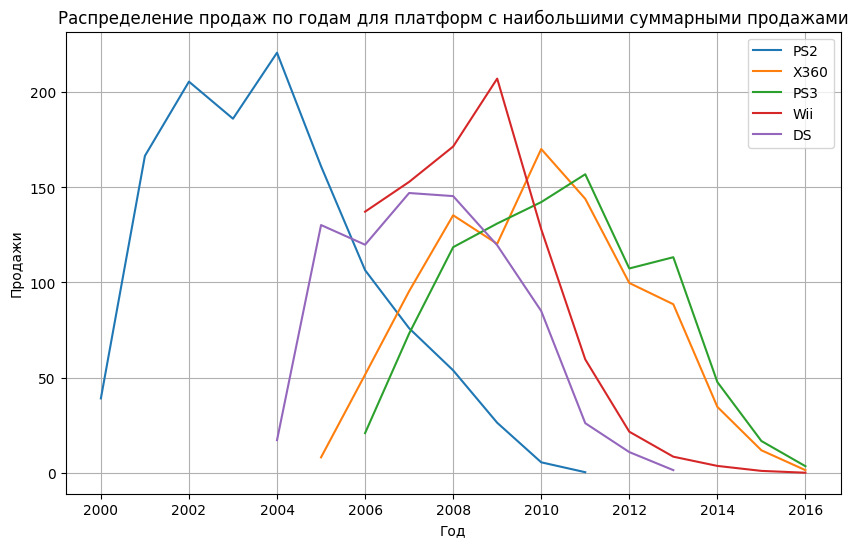

In [33]:
# удалим ошибочные данные
df = df[~((df['platform'] == 'DS') & (df['year_of_release'] < 2004))]

# фильтруем данные по выбранным платформам
filtered_df = df[df['platform'].isin(top_platforms)]

# Создаем график
plt.figure(figsize=(10, 6))
for platform in top_platforms:
    platform_data = filtered_df[filtered_df['platform'] == platform]
    platform_data.groupby('year_of_release')['total_sales'].sum().plot(label=platform)

plt.title('Распределение продаж по годам для платформ с наибольшими суммарными продажами')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.legend()
plt.grid(True)
plt.show()

Изучим, за какой характерный срок появляются новые и исчезают старые платформы:

In [34]:
# сгруппируем данные по платформам и первому/последнему году, когда выпускались игры
platform_years = df.groupby('platform')['year_of_release'].agg(['min', 'max'])

# посчитаем, сколько лет "живут" каждая платформа
platform_years['Lifespan'] = platform_years['max'] - platform_years['min']

# вывод информации таблицей
display(platform_years)

,min,max,Lifespan
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,2004,2013,9
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


In [35]:
# вычислим средний возраст по платформам
average_lifespan = platform_years['Lifespan'].mean()
print('Средний характерный срок жизни платформы:', average_lifespan)

# вычислим частоту появления новых платформ
new_platforms_per_year = df.groupby('year_of_release')['platform'].nunique()
average_new_platforms_per_year = new_platforms_per_year.mean().round(1)
print('Среднее количество новых платформ в год:', average_new_platforms_per_year)

Средний характерный срок жизни платформы: 7.0
Среднее количество новых платформ в год: 6.4


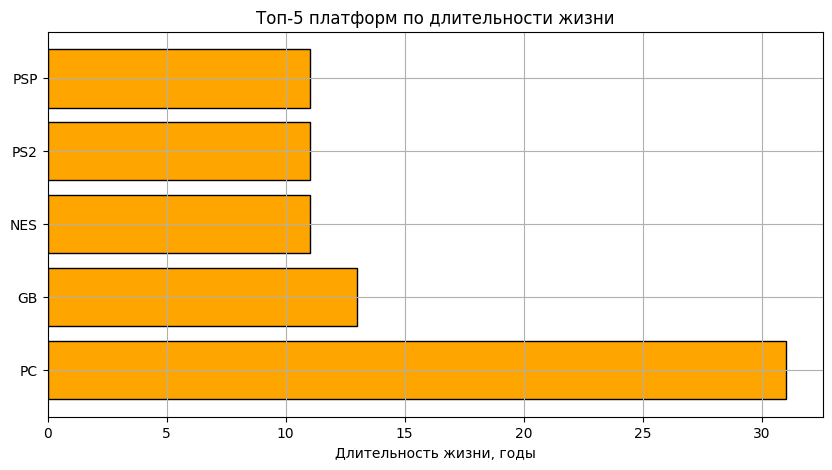

In [36]:
# топ-5 платформ по длительности жизни
top5_lifespan = platform_years['Lifespan'].nlargest(5)

# cоздание горизонтальной столбчатой диаграммы
plt.figure(figsize=(10, 5))
plt.barh(top5_lifespan.index, 
         top5_lifespan.values, 
         color='orange', 
         edgecolor='black'
)
plt.xlabel('Длительность жизни, годы')
plt.title('Топ-5 платформ по длительности жизни')
plt.grid(True)
plt.show()

На первой столбчатой диаграмме "Количество выпущенных игр за каждый год" видно резкое изменение их количества после 1993-1994 года. До этого момента лидерами продаж являлись игры на консолях 2600, NES, SNES, GameBoy.

Глядя на вторую диаграмму можно заметить, что количество выпускаемых игр увеличилось с 1995 года с появлением консоли PlayStation. Это может быть связано с тем, что PS предложила новые возможности для разработчиков игр, включая поддержку 3D-графики, что позволило создавать более сложные игры. Такой подъём по продажам длился по 2001 год. Появилось огромное количество рекламы этих самых игр, и можно сказать с этого момента началась эпоха видеоигр. Отмечу большой скачок по популярности выпускаемых игр на PlayStation в 1998 году. В 1995 году - 99, в 1998 - 248. 

Первая версия консоли PlayStation держала лидерство по продаваемым играм по 2000 год, и тогда вышла PlayStation 2.

За 2 года количество выпущенных игр возросло больше чем в два раза - в 2000 году 350 выпущенных игр, в 2002 целых 830!

PlayStation 2 держала лидерство в роли самой популярной консоли по 2006 год.

В 2007 году вышла Nintendo DS и захватила рынок. Удобная карманная игровая консоль, которую можно взять куда угодно, хоть в поход, хоть в поезд. В 2008-2009 годах количество выпускаемых игр достигло рекордного максимума - 1429 в 2008 и 1427 в 2009 году. Начиная с 2010 года начался спад, который длился до 2014 года.

Выход третьей версии консоли PlayStation не повлиял на количество выпускаемых игр, но возможно повлиял на качество этих самых игр. Выше системные требования, выше ожидания от игроков, выше классы проектов и деньги вкладываемые в компании разработчиков. 

С выходом четвертой версии консоли PlayStation сменилось лидерство по выпускаемым играм - PS4 заменила PS3.

В среднем, платформы "живут" 7 лет. А новые платформы появляются обычно каждые 6.5 лет.
Несомненным лидером по длительности жизни и актуальности среди платформ является PC. Игры на него выходили с 1985 года и продолжают выходить по сегодняшний день.

## Количество выпущенных игр на каждой платформе начиная с 1994 года

In [37]:
# создадим сводную таблицу с количеством выпщуенных игр на платформе
platform_count_df = (
    df[df['year_of_release'] > 1994]
    .groupby('platform')['name']
    .count()
    .reset_index()
    .rename(columns={'name': 'count'})
    .sort_values(by='count', ascending=True)
    .reset_index(drop=True)
)

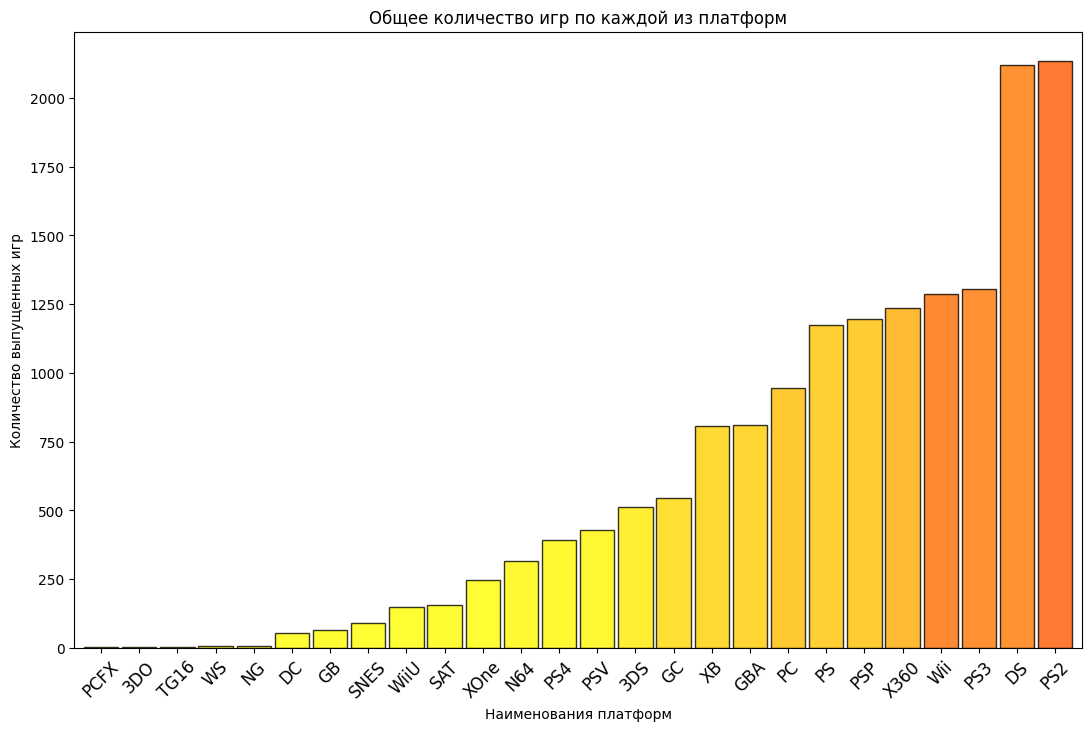

In [38]:
platform_count_df['count'].plot(
    kind='bar',
    figsize=(13,8),
    width=0.9,
    color=colors,
    alpha=0.8,
    edgecolor='black',
)

plt.title('Общее количество игр по каждой из платформ')
plt.xticks(range(len(platform_count_df['platform'])), platform_count_df['platform'], fontsize=12, rotation=45)
plt.xlabel('Наименования платформ')
plt.ylabel('Количество выпущенных игр')
plt.show()


In [39]:
# выведем таблицу
platform_count_df

,platform,count
0,PCFX,1
1,3DO,2
2,TG16,2
3,WS,6
4,NG,6
5,DC,52
6,GB,64
7,SNES,91
8,WiiU,147
9,SAT,154


1. Платформы-лидеры по количеству игр на платформе - **Nintendo DS** (*2121*), **PS2** (*2134*)
2. Следом за ними идут **PlayStation 1** (*1173*), **PlayStation Portable** (*1195*), **Xbox 360** (*1234*), **Wii** (*1286*), **PS3** (*1306*)

## Общие продажи игр на каждой платформе начиная с 1994 года.

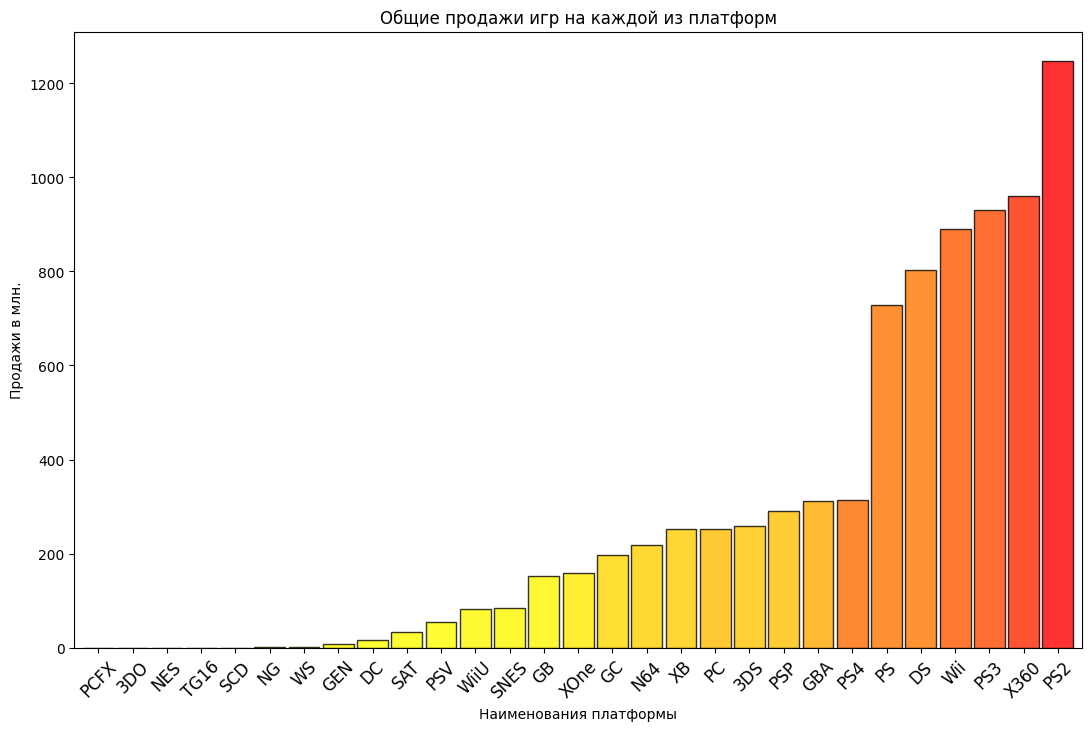

In [40]:
total_per_platform_df = (
    df[df['year_of_release'] >= 1994]
    .groupby('platform')['total_sales']
    .sum()
    .reset_index()
    .rename(columns={'total_sales': 'total_sales_per_platform'})
    .sort_values(by='total_sales_per_platform', ascending=True)
    .reset_index(drop=True)
)




total_per_platform_df['total_sales_per_platform'].plot(
    kind='bar',
    figsize=(13,8),
    width=0.9,
    color=colors,
    alpha=0.8,
    edgecolor='black',
)

plt.title('Общие продажи игр на каждой из платформ')
plt.xticks(range(len(total_per_platform_df['platform'])), total_per_platform_df['platform'], fontsize=12, rotation=45)
plt.xlabel('Наименования платформы')
plt.ylabel('Продажи в млн.')
plt.show()


In [41]:
# выведем таблицей информацию
total_per_platform_df

,platform,total_sales_per_platform
0,PCFX,0.03
1,3DO,0.10
2,NES,0.11
3,TG16,0.16
4,SCD,0.36
5,NG,1.23
6,WS,1.42
7,GEN,8.13
8,DC,15.95
9,SAT,33.59


 - PS2 является платформой с самыми высокими общими продажами игр, достигающими 1247.28 млн долларов.
 - Следующие по величине продаж платформы - это X360 и PS3, с продажами 961.30 млн и 931.34 млн долларов соответственно.
 - Wii и DS также показывают высокие продажи, составляющие 891.18 млн и 802.77 млн долларов соответственно.
 - Среди новых платформ PS4 имеет наибольшие продажи, достигающие 314.14 млн долларов.
 - Некоторые платформы, такие как PCFX, 3DO, NES, и TG16, имеют очень низкие общие продажи, менее 0.2 млн долларов.

Эти данные могут быть полезны для определения, какие платформы были наиболее успешными в прошлом, и могут помочь предсказать, какие платформы будут популярны в будущем.

## Промежуточный вывод по визуализациям в исследовательском анализе данных:

По поставленным задачам были построены и проанализированы большие объемы данных, а именно:
1. Изучили сколько игр выпускалось в разные годы
    - Больше всего игр было выпущено в 2008-2009 годах (1429 и 1427 соответственно)
2. Рассмотрели, как менялось количество выпущенных игр по платформам
    - 1980 - 1983 - самая популярная платформа 2600
    - 1984 - 1990 - самая популярная платформа NES
    - 1991 - 1994 - самая популярная платформа SNES
    - 1995 - 2000 - самая популярная платформа PS. Заметно резкое увеличение по продажам в сравнении с предыдущими годами
    - 2001 - 2006 - самая популярная платформа - PS2. Уровень продаж находится примерно на том же уровне, что и при PS
    - 2007 - 2010 - самая популярная платформа - DS. Уровень продаж дошел до рекордного значения - 493 игры за год. Далее наблюдается спад.
    - 2011 - 2014 - самая популярная платформа - PS3.
    - 2015 - 2016 - самая популярная платформа - PS4.
3. Построили распределения по годам по платформам с наибольшими суммарными продажами.
4. Построили диаграмму общего количества игр по каждой из платформ - в лидерах:
    - PS - 1173
    - PSP -1195
    - X360 - 1234
    - Wii - 1286
    - PS3 - 1306
    - DS - 2121
    - PS2 - 2134
5. Построили столбчатую диаграмму общих продаж игр на каждой платформе. Несомненный лидер - PS2 с его 1.2 млрд. долларов. За ним следуют DS, Wii, PS3, X360 - с показателями от 800 до 961 млн. долларов за всё время

## Актуальный период

Актуальным периодом по продажам можно выделить период начиная с 2013 по 2016 год.

Создадим сводную таблицу, в которой выделим период начиная с 2013 по 2016 год

In [42]:
df_actual_sale = df.query('year_of_release >= 2013 and year_of_release <= 2016' )

df_actual_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2234 non-null   object 
 1   platform         2234 non-null   object 
 2   year_of_release  2234 non-null   uint16 
 3   genre            2234 non-null   object 
 4   na_sales         2234 non-null   float64
 5   eu_sales         2234 non-null   float64
 6   jp_sales         2234 non-null   float64
 7   other_sales      2234 non-null   float64
 8   critic_score     2234 non-null   int8   
 9   user_score       2234 non-null   int16  
 10  rating           2234 non-null   object 
 11  total_sales      2234 non-null   float64
dtypes: float64(5), int16(1), int8(1), object(4), uint16(1)
memory usage: 185.4+ KB


Изучим, какие платформы лидируют по продажам, растут, или падают.

In [43]:
df_best_sales = pd.pivot_table(
    df_actual_sale, 
    index=['platform','year_of_release'],
    values='total_sales', 
    aggfunc = 'sum'
)

df_best_sales.info()

df_best_sales.head(20)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40 entries, ('3DS', 2013) to ('XOne', 2016)
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_sales  40 non-null     float64
dtypes: float64(1)
memory usage: 641.0+ bytes


total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.73
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12

In [44]:
total_per_platform = (
    df_best_sales.groupby('platform')['total_sales']
    .sum()
    .reset_index()
    .rename(columns={'total_sales': 'total_sales_per_platform'})
    .sort_values(by='total_sales_per_platform', ascending=True)
    .reset_index(drop=True)   
)
total_per_platform

,platform,total_sales_per_platform
0,DS,1.54
1,PSP,3.50
2,Wii,13.66
3,PSV,32.99
4,PC,39.78
5,WiiU,64.63
6,X360,136.80
7,3DS,143.25
8,XOne,159.32
9,PS3,181.43


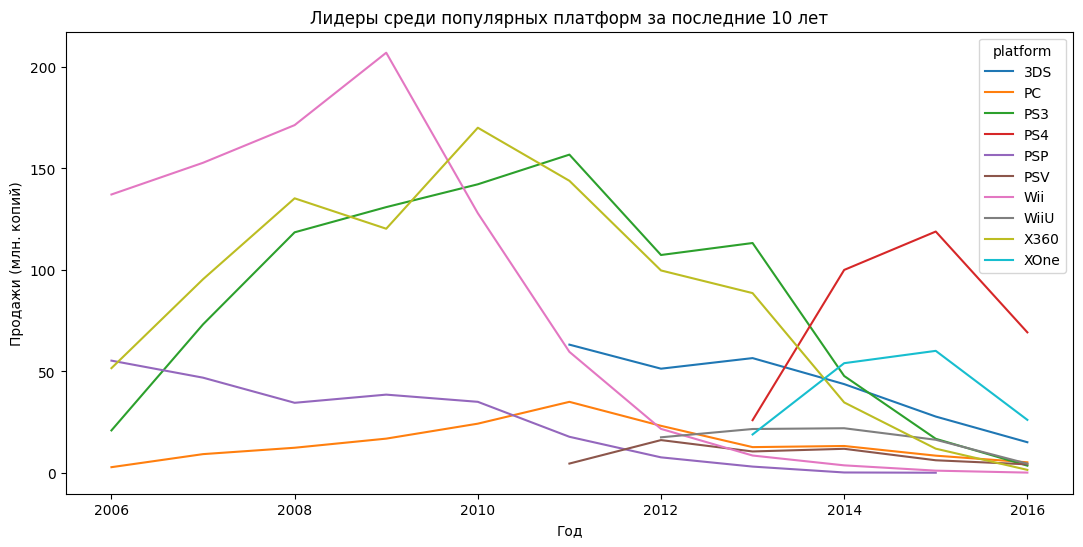

In [45]:
# создадим список актуальных на 2016 год платформ
list_actual_platform = df_actual_sale.pivot_table(index = ['platform'],
    values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False).head(10).index.tolist()

platform_trends = df[(df['platform'].isin(list_actual_platform)) & (df['year_of_release'] >= 2006)].pivot_table(
    index = ['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
# Построим график

plt.figure(figsize=(13,6))
ax = sns.lineplot(x = 'year_of_release', 
                  y = 'total_sales', 
                  data = platform_trends, 
                  hue = 'platform')
ax.set(xlabel = 'Год', ylabel = 'Продажи (млн. копий)', title = 'Лидеры среди популярных платформ за последние 10 лет')
plt.show()

Посчитаем выручку среди топ-3 лучших платформ в актуальные даты, а также общую выручку:

In [46]:
top_platforms = pd.pivot_table(
    df_actual_sale,
    index='platform',
    values='total_sales',
    aggfunc='sum'
).sort_values('total_sales', ascending=False)

top_platforms

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.78
PSV,32.99
Wii,13.66


In [47]:
# Сортируем платформы по продажам и берем топ-3
top3_platforms = top_platforms.sort_values(by='total_sales', ascending=False).head(3)

total_revenue = top_platforms['total_sales'].sum().round()

# Считаем сумму продаж для топ-3 платформ
top3_sales = top3_platforms['total_sales'].sum().round()

print(f'Топ 3 платформ сделали {top3_sales} млн.$ выручки\n в то время как общая выручка по всем платформам составила {total_revenue} млн.$')

Топ 3 платформ сделали 655.0 млн.$ выручки
 в то время как общая выручка по всем платформам составила 1091.0 млн.$


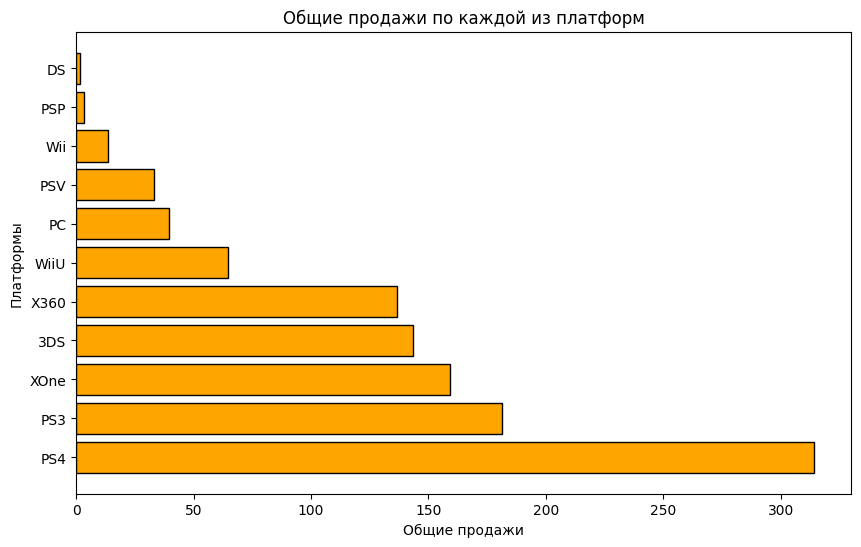

In [48]:
# отсортируем по общим продажам
sorted_platforms = top_platforms.sort_values(by='total_sales', ascending=False)

# создадим столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.barh(sorted_platforms.index,
         sorted_platforms['total_sales'],
         color='orange',
         edgecolor='black'
)
plt.xlabel('Общие продажи')
plt.ylabel('Платформы')
plt.title('Общие продажи по каждой из платформ')
plt.show()


In [49]:
top_platforms

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.78
PSV,32.99
Wii,13.66


Топ 3 платформы являются PS4, PS3, Xbox One.

В сумме три платформы заработали  489 млн. долларов выручки, в то время как общая выручка по всем платформам составила 714 млн. долларов.

Рассмотрим на ящиках с усами продажи игр на разных платформах

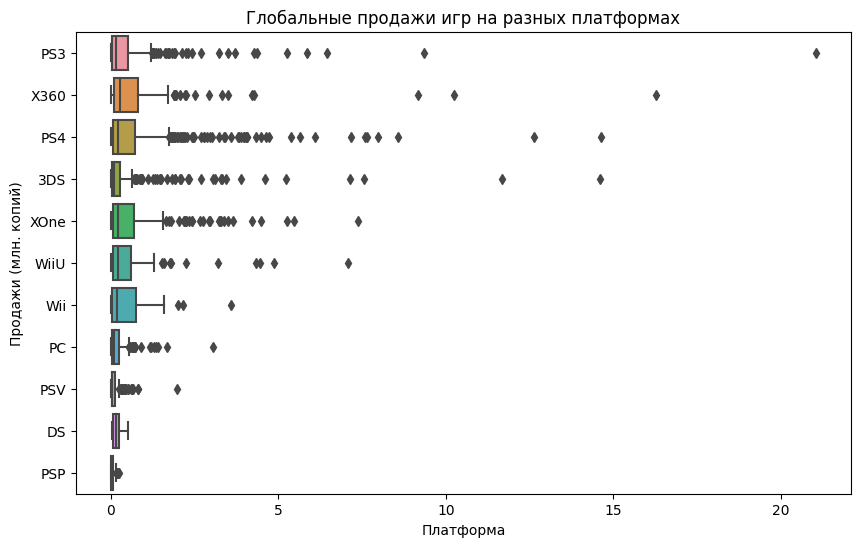

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_sales', y='platform', data=df_actual_sale, orient='h')
plt.title('Глобальные продажи игр на разных платформах')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.show()


На такой диаграмме размаха плохо видны сами "ящики" из-за наличия выбросов с большими значениями. Ограничим данные уменьшив ось x до значения в 3.

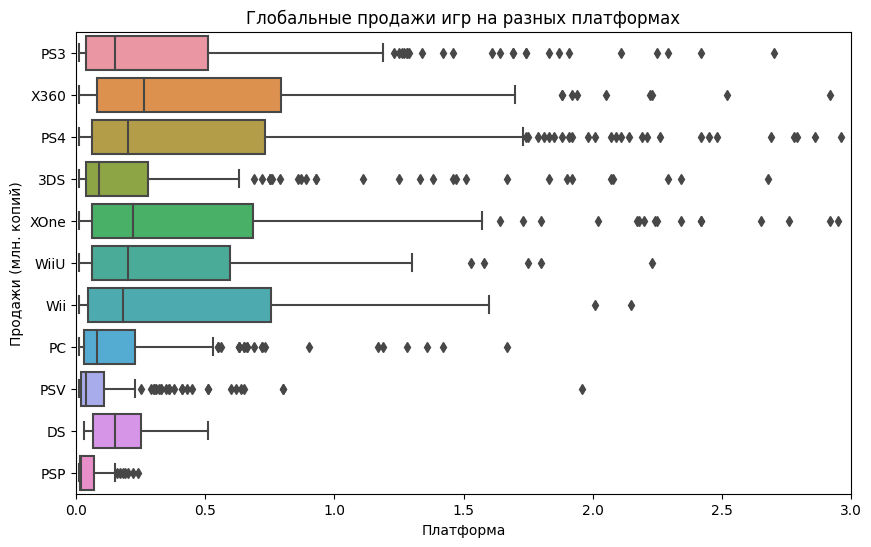

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_sales', y='platform', data=df_actual_sale, orient='h')
plt.title('Глобальные продажи игр на разных платформах')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.xlim(0, 3)
plt.show()


Внимательно изучим топ 6 платформ

In [52]:
# Создадим данные по каждой из топ платформ:

PS3_sales = df_actual_sale.query('platform == "PS3"')
PS4_sales = df_actual_sale.query('platform == "PS4"')
X360_sales = df_actual_sale.query('platform == "X360"')
DS3_sales = df_actual_sale.query('platform == "3DS"')
XOne_sales = df_actual_sale.query('platform == "XOne"')
WiiU_sales = df_actual_sale.query('platform == "WiiU"')

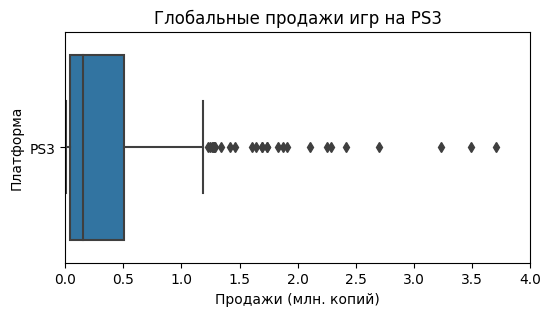

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

In [53]:
# PS3
plt.figure(figsize=(6, 3))
sns.boxplot(x='total_sales', y='platform', data=PS3_sales, orient='h')
plt.title('Глобальные продажи игр на PS3')
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Платформа')
plt.xlim(0, 4)
plt.show()

PS3_sales['total_sales'].describe()

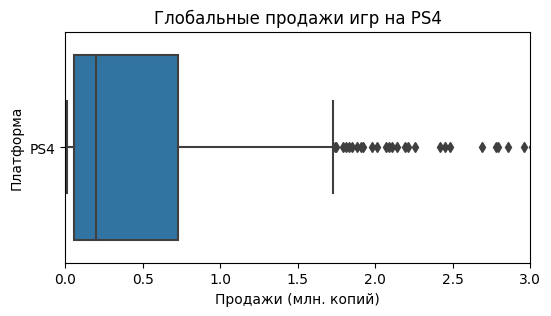

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [54]:
# PS4
plt.figure(figsize=(6, 3))
sns.boxplot(x='total_sales', y='platform', data=PS4_sales, orient='h')
plt.title('Глобальные продажи игр на PS4')
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Платформа')
plt.xlim(0, 3)
plt.show()

PS4_sales['total_sales'].describe()

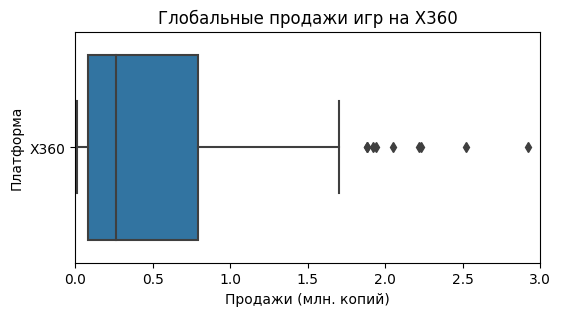

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

In [55]:
# X360
plt.figure(figsize=(6, 3))
sns.boxplot(x='total_sales', y='platform', data=X360_sales, orient='h')
plt.title('Глобальные продажи игр на X360')
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Платформа')
plt.xlim(0, 3)
plt.show()

X360_sales['total_sales'].describe()

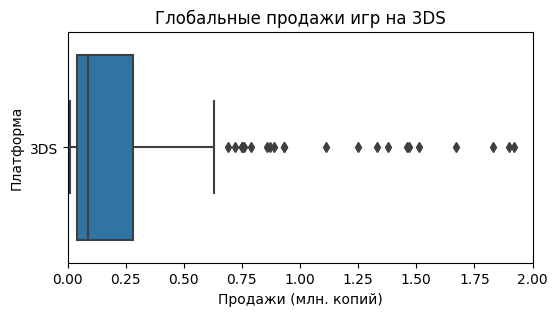

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

In [56]:
# 3DS
plt.figure(figsize=(6, 3))
sns.boxplot(x='total_sales', y='platform', data=DS3_sales, orient='h')
plt.title('Глобальные продажи игр на 3DS')
plt.xlabel('Продажи (млн. копий)')
plt.xlim(0, 2)
plt.ylabel('Платформа')
plt.show()

DS3_sales['total_sales'].describe()

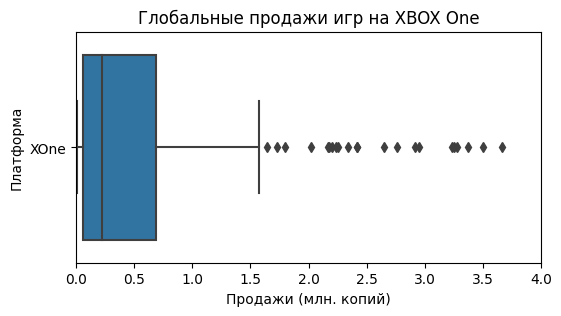

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [57]:
# XBOX One
plt.figure(figsize=(6, 3))
sns.boxplot(x='total_sales', y='platform', data=XOne_sales, orient='h')
plt.title('Глобальные продажи игр на XBOX One')
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Платформа')
plt.xlim(0, 4)
plt.show()

XOne_sales['total_sales'].describe()

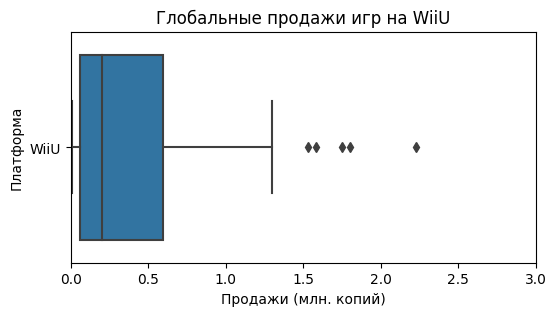

count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: total_sales, dtype: float64

In [58]:
# WiiU
plt.figure(figsize=(6, 3))
sns.boxplot(x='total_sales', y='platform', data=WiiU_sales, orient='h')
plt.title('Глобальные продажи игр на WiiU')
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Платформа')
plt.xlim(0, 3)
plt.show()

WiiU_sales['total_sales'].describe()

Вывод:

1. Общая картина: Продажи игр сильно варьируются между платформами. Предполагаю, что это связано с различными факторами, такими как популярность платформы, количество выпущенных игр и общее качество этих игр. Некоторые игры становятся очень популярными и приносят значительную прибыль, в то время как большинство игр не достигают высокого уровня продаж. 

2. Средние продажи: Средние продажи игр на каждой платформе представляют собой среднее значение общих продаж каждой игры на конкретной платформе. Это значение может служить полезным показателем общей популярности и успешности платформы.

Платформы отдельно:
1. PS4 (PlayStation 4):
 - Средняя выручка на игру составляет 981 тыс. долларов.
 - 3/4 игр заработали до 1.1 млн. долларов, что говорит о популярности и продаваемости игр на этой платформе.
 - Рекордные продажи составляют 12,6 млн. долларов.
2. PS3 (PlayStation 3):
 - Средняя выручка на игру на PS3 — 950 тыс. долларов.
 - 3/4 игр заработали до 933 тыс. долларов.
 - Рекордные продажи на PS3 составляют 21 млн. долларов.
3. XOne (Xbox One):
 - Средняя выручка на игру на XOne — 789 тыс. долларов.
 - 3/4 игр заработали до 1.16 млн. долларов.
 - Рекордные продажи на XOne — 5.47 млн. долларов.
4. X360 (Xbox 360):
 - Средняя выручка на игру на X360 — 1.05 млн. долларов.
 - 3/4 игр заработали до 1.07 млн. долларов.
 - Рекордные продажи на X360 — 16,3 млн. долларов.
5. 3DS (Nintendo 3DS):
 - Средняя выручка на игру на 3DS — 599 тыс. долларов.
 - 3/4 игр заработали до 510 тыс. долларов.
 - Рекордные продажи на 3DS — 4.59 млн. долларов.
6. WiiU
 - Средняя выручка на игру на WiiU - 742. тыс. долларов
 - 3/4 игр заработали до 760. тыс. долларов
 - Рекордные продажи на WiiU составляют 7,09 млн. копий.

## Влияние отзывов на продажи. Платформа PS4

Для начала можно построить диаграмму рассеяния, где по оси X будут отзывы, по оси Y - общие продажи

In [59]:
# Комментарий ревьюера 0
print(len(df_actual_sale[df_actual_sale['user_score'] > 0]))
print(len(df_actual_sale[df_actual_sale['critic_score'] > 0]))
print(len(df_actual_sale[(df_actual_sale['user_score'] > 0) & (df_actual_sale['critic_score'] > 0)]))

1193
992
977


In [60]:
# Комментарий ревьюера 0
temp = df_actual_sale.copy() # создаем копию датасета до преобразования
len(temp)

2234

In [61]:
# создадим датафрейм для анализа оценок пользователей 
df_user_score = df_actual_sale[df_actual_sale['user_score'] > 0] 

# создадим датафрейм для анализа оценок критиков
df_critic_score = df_actual_sale[df_actual_sale['critic_score'] > 0]

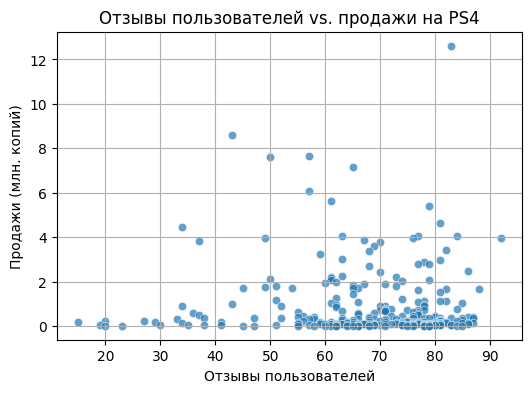

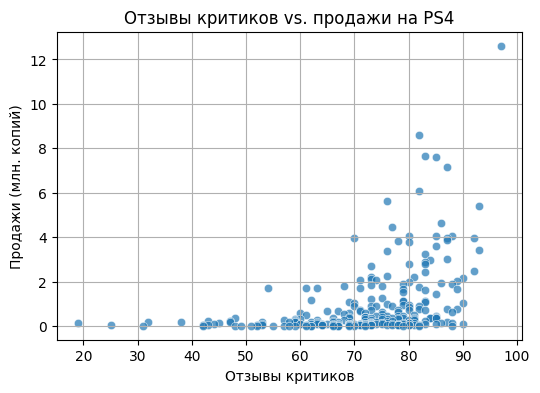

Корреляция между отзывами пользователей и продажами на PS4: -0.03
Корреляция между отзывами критиков и продажами на PS4: 0.41


In [62]:
# создадим датафрейм с условием платформы PS4 и пользовательскими оценками
df_ps4_user = df_user_score[(df_user_score['platform'] == 'PS4')]

# Построим диаграмму рассеяния
plt.figure(figsize=(6, 4))
sns.scatterplot(x='user_score', 
                y='total_sales', 
                data=df_ps4_user,
                alpha=0.7)
plt.title('Отзывы пользователей vs. продажи на PS4')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи (млн. копий)')
plt.grid(True)
plt.show()

# создадим датафрейм с условием платформы PS4 и оценками критиков
df_ps4_critic = df_critic_score[df_critic_score['platform'] == 'PS4']

# Построим диаграмму рассеяния
plt.figure(figsize=(6, 4))
sns.scatterplot(x='critic_score', 
                y='total_sales', 
                data=df_ps4_critic,
                alpha=0.7)
plt.title('Отзывы критиков vs. продажи на PS4')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи (млн. копий)')
plt.grid(True)
plt.show()


# Посчитаем корреляцию
correlation_user_sales = df_ps4_user['user_score'].corr(df_ps4_user['total_sales'])
print(f"Корреляция между отзывами пользователей и продажами на PS4: {correlation_user_sales:.2f}")

# Посчитаем корреляцию
correlation_user_sales = df_ps4_critic['critic_score'].corr(df_ps4_critic['total_sales'])
print(f"Корреляция между отзывами критиков и продажами на PS4: {correlation_user_sales:.2f}")

Нулевая и даже немного отрицательная корреляция между отзывами пользователей и продажами может показаться контринтуитивной, но этому есть объяснение - пользователи более критичны к играм, особенно если они не оправдали их длительного ожидания. 

С другой стороны, положительная корреляция между отзывами критиков и продажами говорит о том, что игры, которые хорошо оценивают критики, обычно имеют более высокие продажи. Огромное количество игроков полагаются на отзывы критиков при выборе игр для покупки.

Числовые значения корреляции:
 - Корреляция между отзывами пользователей и продажами на PS4: -0.03 (слабая связь).
 - Корреляция между отзывами критиков и продажами на PS4: 0.41 (средняя связь).

## Сравнение с отзывами/продажами на других платформах

In [63]:
# создадим датафрейм для анализа оценок пользователей 
df_user_score = df_actual_sale[df_actual_sale['user_score'] > 0] 

# создадим датафрейм для анализа оценок критиков
df_critic_score = df_actual_sale[df_actual_sale['critic_score'] > 0]

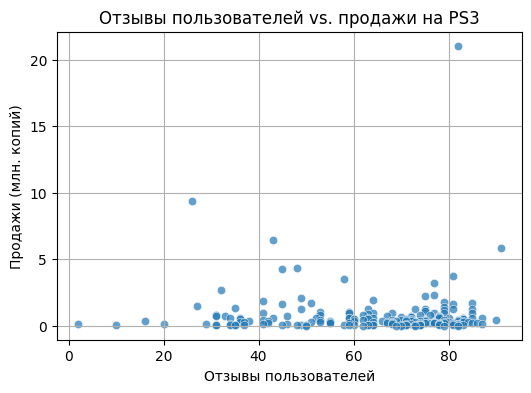

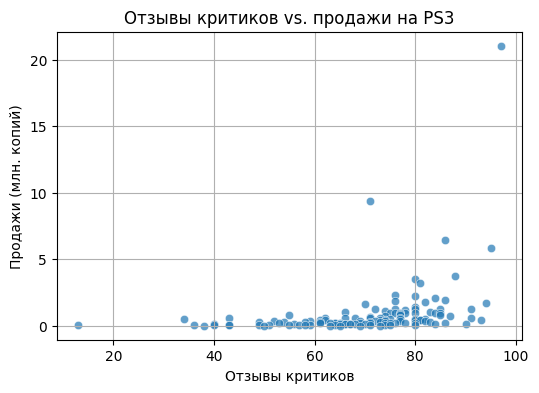

Корреляция между отзывами пользователей и продажами на PS3: 0.00
Корреляция между отзывами критиков и продажами на PS3: 0.33


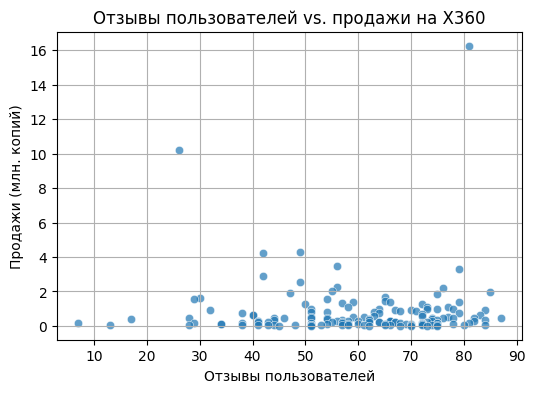

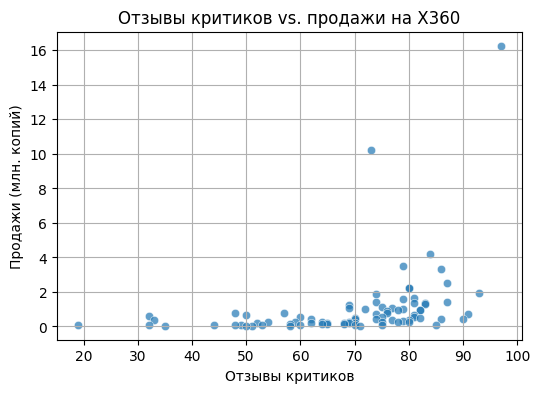

Корреляция между отзывами пользователей и продажами на X360: -0.01
Корреляция между отзывами критиков и продажами на X360: 0.35


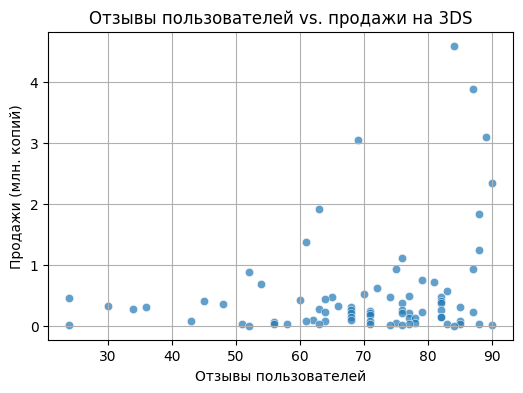

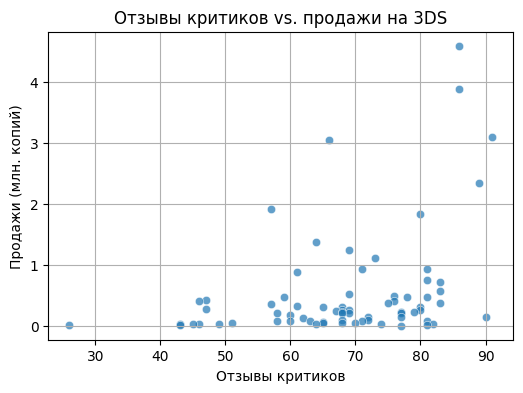

Корреляция между отзывами пользователей и продажами на 3DS: 0.24
Корреляция между отзывами критиков и продажами на 3DS: 0.36


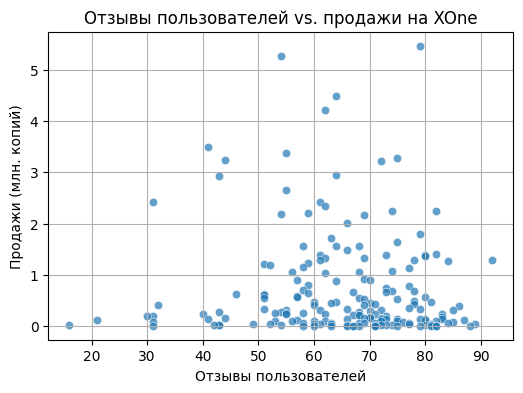

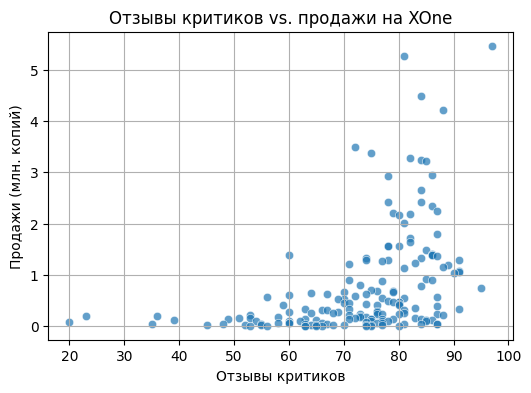

Корреляция между отзывами пользователей и продажами на XOne: -0.07
Корреляция между отзывами критиков и продажами на XOne: 0.42


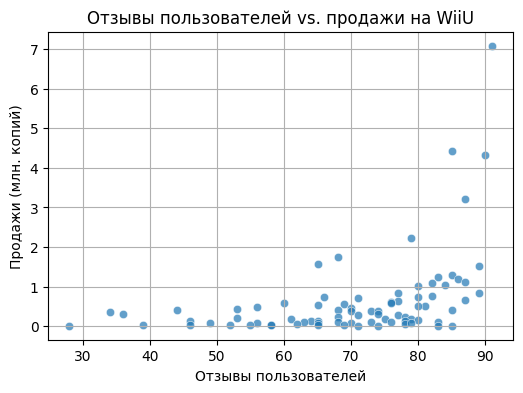

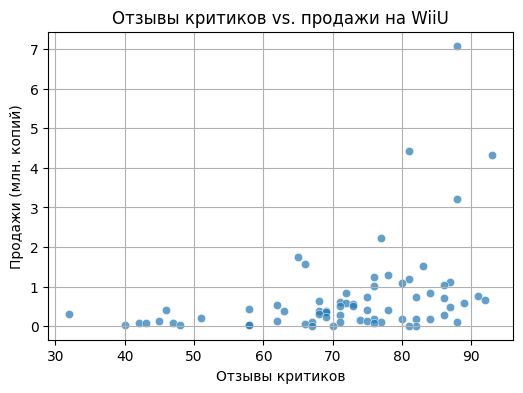

Корреляция между отзывами пользователей и продажами на WiiU: 0.42
Корреляция между отзывами критиков и продажами на WiiU: 0.38


In [64]:
def scatter_for_platforms(platforms, df_user_score, df_critic_score):
    for platform in platforms:
        # датафреймы отдельно для оценок пользователей и критиков
        df_platform_user = df_user_score[df_user_score['platform'] == platform]
        df_platform_critic = df_critic_score[df_critic_score['platform'] == platform]

        # построим диаграмму рассеяния для оценок пользователей
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x='user_score', 
                        y='total_sales', 
                        data=df_platform_user,
                        alpha=0.7)
        plt.title(f'Отзывы пользователей vs. продажи на {platform}')
        plt.xlabel('Отзывы пользователей')
        plt.ylabel('Продажи (млн. копий)')
        plt.grid(True)
        plt.show()

        # построим диаграмму рассеяния для оценок критиков
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x='critic_score', 
                        y='total_sales', 
                        data=df_platform_critic,
                        alpha=0.7)
        plt.title(f'Отзывы критиков vs. продажи на {platform}')
        plt.xlabel('Отзывы критиков')
        plt.ylabel('Продажи (млн. копий)')
        plt.grid(True)
        plt.show()

        # посчитаем корреляцию для оценок пользователей
        correlation_user_sales = df_platform_user['user_score'].corr(df_platform_user['total_sales'])
        print(f"Корреляция между отзывами пользователей и продажами на {platform}: {correlation_user_sales:.2f}")
        
        # посчитаем корреляцию для оценок критиков
        correlation_critic_sales = df_platform_critic['critic_score'].corr(df_platform_critic['total_sales'])
        print(f"Корреляция между отзывами критиков и продажами на {platform}: {correlation_critic_sales:.2f}")

list_of_platform  = ['PS3', 'X360', '3DS', 'XOne', 'WiiU']
scatter_for_platforms(list_of_platform, df_user_score, df_critic_score)

Выводы по каждой из платформ:
1. PS3:
Отзывы пользователей не влияют на продажи (корреляция равна 0.00), в то время как отзывы критиков имеют слабую положительную связь с продажами (корреляция равна 0.33). Это может говорить о том, что игроки больше доверяют мнению критиков при выборе игр на этой платформе.

2. Xbox 360:
 Аналогично PS3, отзывы пользователей практически не влияют на продажи (корреляция равна -0.01), в то время как отзывы критиков имеют слабую положительную связь с продажами (корреляция равна 0.35).

3. 3DS:
 Отзывы пользователей имеют слабую положительную связь с продажами (корреляция равна 0.24), а отзывы критиков - умеренную положительную связь (корреляция равна 0.36). Это может говорить о том, что на этой платформе мнение как пользователей, так и критиков важно для продаж.

4. Xbox One:
Отзывы пользователей слабо отрицательно коррелируют с продажами (корреляция равна -0.07), в то время как отзывы критиков имеют умеренную положительную связь с продажами (корреляция равна 0.42). Это может говорить о том, что игроки на этой платформе больше доверяют мнению критиков.

5. WiiU:
И отзывы пользователей, и отзывы критиков имеют умеренную положительную связь с продажами (корреляция равна 0.42 и 0.38 соответственно). Это говорит о том, что на этой платформе мнение как пользователей, так и критиков важно для продаж.


Общий вывод:

В целом, отзывы критиков имеют большее влияние на продажи игр, чем отзывы пользователей. Это может быть связано с тем, что критики обычно имеют больше опыта и знаний о играх, и их мнение может быть более объективным. Однако на некоторых платформах, таких как 3DS и WiiU, отзывы пользователей также важны. Это может говорить о том, что игроки на этих платформах больше доверяют мнению других пользователей

## Жанры игр

In [65]:
# создадим функцию для создания сводных таблиц

def create_pivot(
    data,
    index,
    values, 
    aggfunc='sum',
    sort_by=None,
    ascending=False
):
    pivot_table = pd.pivot_table(
        data, 
        index=index, 
        values=values,
        aggfunc=aggfunc
    )
    if sort_by:
        pivot_table = pivot_table.sort_values(sort_by, ascending=ascending)
    return pivot_table

# создадим функцию для постройки столбчатых диаграмм

def create_bar(
    data, 
    column, 
    xlabel, 
    ylabel, 
    title, 
    color='orange', 
    edgecolor='black', 
    figsize=(8, 5)):
    plt.figure(figsize=figsize)
    plt.barh(data.index, 
             data[column], 
             color=color, 
             edgecolor=edgecolor
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [66]:
# создадим сводную таблицу с информацией о медианных продажах на каждый из жанров игр
df_genre = create_pivot(df_actual_sale, 'genre', 'total_sales', aggfunc=('median', 'sum'), sort_by='median')
df_genre

,median,sum
genre,,
Shooter,0.450,232.98
Sports,0.240,150.65
Platform,0.225,42.63
Role-Playing,0.125,145.89
Fighting,0.125,35.31
Racing,0.120,39.89
Action,0.110,322.22
Simulation,0.100,21.76
Misc,0.100,62.82


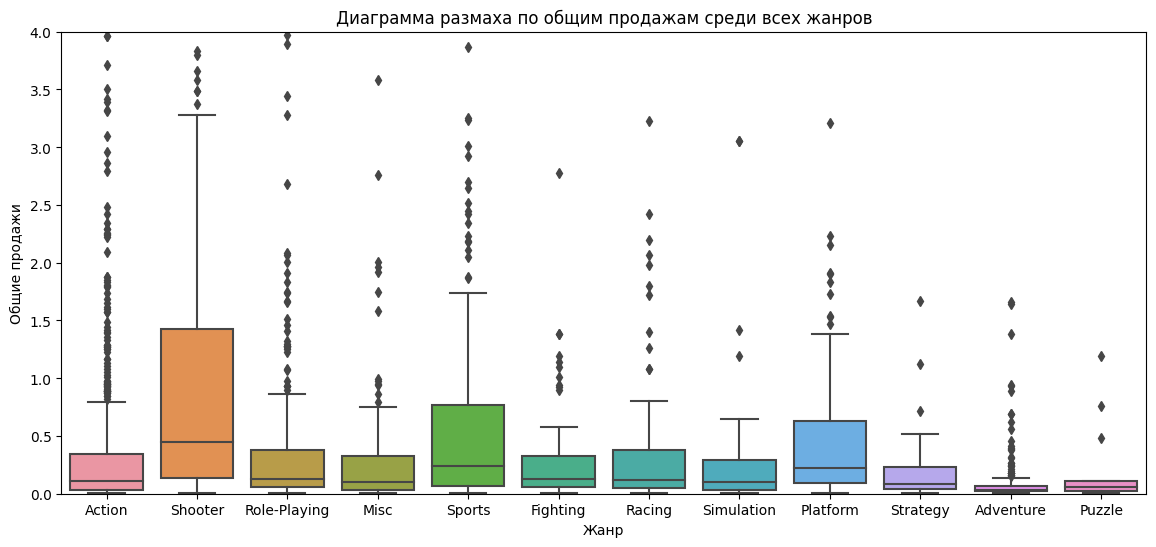

In [67]:
# создаем список жанров, которые хотим визуализировать
genres = ['Action', 'Sports', 'Role-Playing', 'Shooter', 'Misc']

# создаем новый DataFrame, который содержит только игры из выбранных жанров
df_genres = df_actual_sale[df_actual_sale['genre'].isin(genres)]

# создаем boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='genre', y='total_sales', data=df_actual_sale)
plt.title('Диаграмма размаха по общим продажам среди всех жанров')
plt.xlabel('Жанр')
plt.ylim(0, 4)
plt.ylabel('Общие продажи')
plt.show()

 - Жанры с самыми высокими медианными продажами - это **Shooter** (0.45 млн) и **Sports** (0.24 млн). Это указывает на то, что типичная игра в этих жанрах имеет более высокие продажи по сравнению с другими жанрами.
 - Жанр **Action**, несмотря на самые высокие общие продажи (322.22 млн), имеет более низкую медиану (0.11 млн) по сравнению с жанрами **Shooter** и **Sports**. Это может указывать на большую вариативность продаж в этом жанре, где некоторые игры имеют очень высокие продажи, в то время как другие - низкие.
 - Жанры с самыми низкими медианными продажами - это **Puzzle** (0.06 млн) и **Adventure** (0.03 млн). Это может указывать на то, что типичная игра в этих жанрах имеет более низкие продажи по сравнению с другими жанрами.

1. Выбран актуальный период для анализа данных - 2013 по 2016 год  
2. Проанализированы какие платформы являются лидерами по продажам - PS4, PS3, XOne, DS3, X360. В сумме три платформы заработали  489 млн. долларов выручки, в то время как общая выручка по всем платформам составила 714 млн. долларов.
3. Построены ящики с усами по глобальным продажам игр в разбивке по платформам. Продажи игр сильно варьируются между платформами. Предполагаю, что это связано с различными факторами, такими как популярность платформы, количество выпущенных игр и общее качество этих игр. Некоторые игры становятся очень популярными и приносят значительную прибыль, в то время как большинство игр не достигают высокого уровня продаж.
4. Проведена корреляционная связь между продажами и оценками критиков и оценками пользователей. Отзывы критиков имеют большее влияние на продажи игр, чем отзывы пользователей. Это может быть связано с тем, что критики обычно имеют больше опыта и знаний о играх, и их мнение может быть более объективным. Однако на некоторых платформах, таких как 3DS и WiiU, отзывы пользователей также важны. Это может говорить о том, что игроки на этих платформах больше доверяют мнению других пользователей
5. Распределили продажи по жанрам и установили самые прибыльные и неприбыльные жанры. Самые прибыльные по медианными продажами - Shooter (0.45 млн) и Sports (0.24 млн). Жанры с самыми низкими медианными продажами - Puzzle (0.06 млн) и Adventure (0.03 млн).

# Составление портрета пользователя каждого региона

## Самые популярные платформы (топ-5)

In [68]:
# очистим данные
na_platform = df_actual_sale.query('na_sales > 0')
eu_platform = df_actual_sale.query('eu_sales > 0')
jp_platform = df_actual_sale.query('jp_sales > 0')
other_platform = df_actual_sale.query('other_sales > 0')

In [69]:
na_pivot_platform = create_pivot(na_platform, 'platform', 'na_sales', sort_by='na_sales')
eu_pivot_platform = create_pivot(eu_platform, 'platform', 'eu_sales', sort_by='eu_sales')
jp_pivot_platform = create_pivot(jp_platform, 'platform', 'jp_sales', sort_by='jp_sales')
other_pivot_platform = create_pivot(other_platform, 'platform', 'other_sales', sort_by='other_sales')

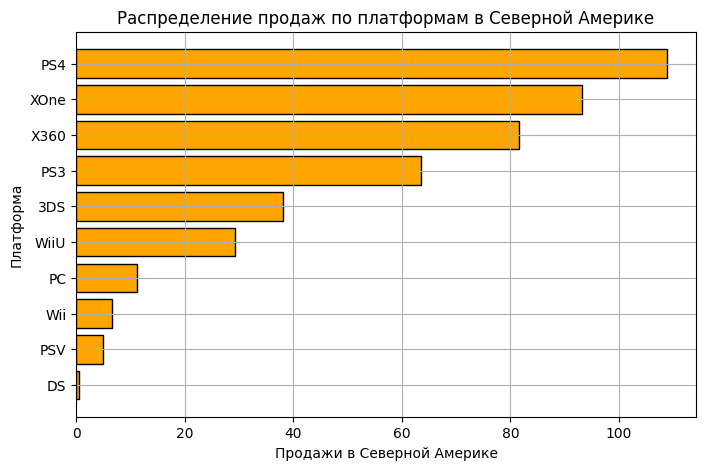

In [70]:
na_pivot_platform = na_pivot_platform.sort_values('na_sales', ascending=True)

create_bar(na_pivot_platform, 
           'na_sales', 
           'Продажи в Северной Америке', 
           'Платформа', 
           'Распределение продаж по платформам в Северной Америке'
)

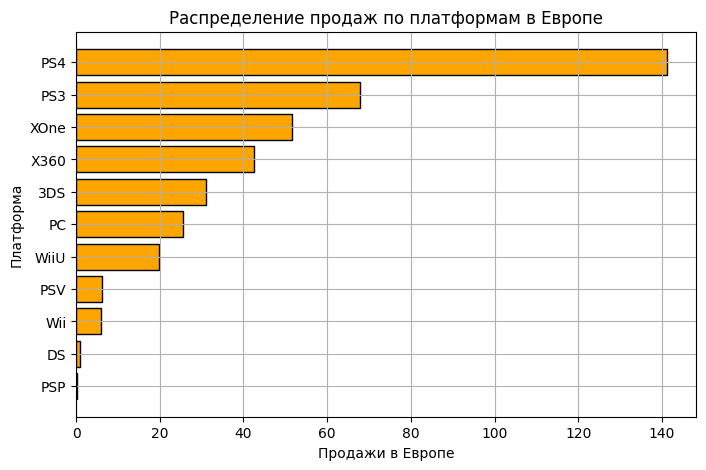

In [71]:
eu_pivot_platform = eu_pivot_platform.sort_values('eu_sales', ascending=True)

create_bar(eu_pivot_platform,
           'eu_sales',
           'Продажи в Европе',
           'Платформа',
           'Распределение продаж по платформам в Европе'
)

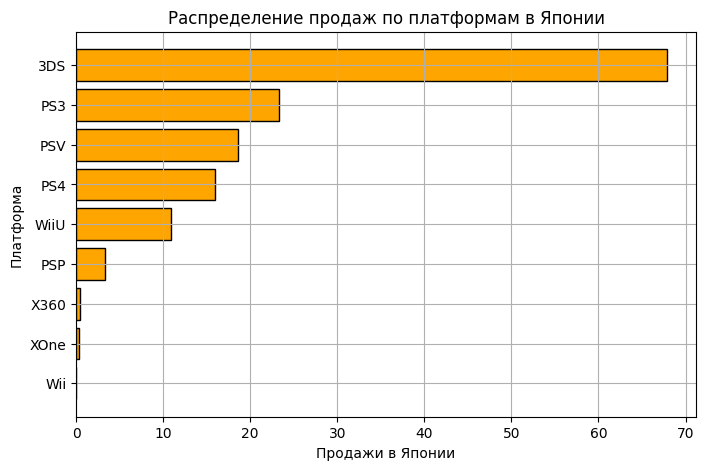

In [72]:
jp_pivot_platform = jp_pivot_platform.sort_values('jp_sales', ascending=True)

create_bar(jp_pivot_platform, 
           'jp_sales', 
           'Продажи в Японии', 
           'Платформа', 
           'Распределение продаж по платформам в Японии'
)

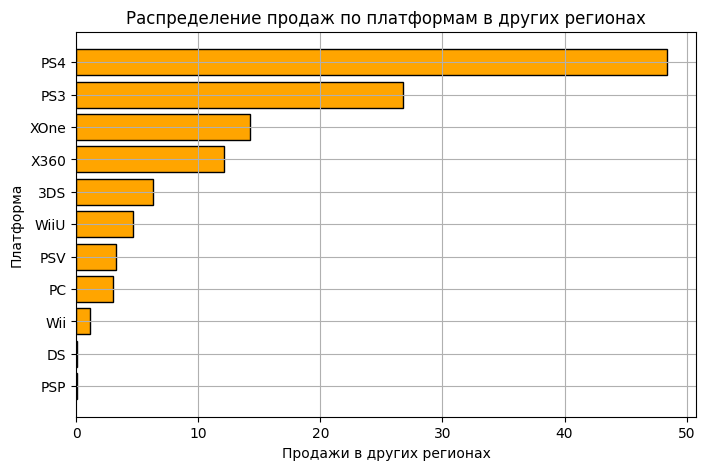

In [73]:
other_pivot_platform = other_pivot_platform.sort_values('other_sales', ascending=True)

create_bar(other_pivot_platform, 
           'other_sales', 
           'Продажи в других регионах', 
           'Платформа', 
           'Распределение продаж по платформам в других регионах'
)

In [74]:
total_sales_by_platform = pd.concat([na_pivot_platform, eu_pivot_platform, jp_pivot_platform, other_pivot_platform], axis=1)
total_sales_by_platform.columns = ['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales']
total_sales_by_platform['Total Sales'] = total_sales_by_platform.sum(axis=1)
total_sales_by_platform.fillna(0, inplace=True)

total_sales_by_platform.sort_values(by='Total Sales', ascending=False)

,NA Sales,EU Sales,JP Sales,Other Sales,Total Sales
platform,,,,,
PS4,108.74,141.09,15.96,48.35,314.14
PS3,63.50,67.81,23.35,26.77,181.43
XOne,93.12,51.59,0.34,14.27,159.32
3DS,38.20,30.96,67.81,6.28,143.25
X360,81.66,42.52,0.51,12.11,136.80
WiiU,29.21,19.85,10.88,4.69,64.63
PC,11.17,25.61,0.00,3.00,39.78
PSV,5.04,6.10,18.59,3.26,32.99
Wii,6.56,5.93,0.05,1.12,13.66


Самые популярные платформы по регионам:
1. Северная Америка:
 - PS4 - 108.74
 - XOne - 93.12
 - X360 - 81.66
 - PS3 - 63.50
 - WiiU - 38.20
2. Европа:
 - PS4 - 141.09
 - PS3 - 67.81
 - XOne - 51.59
 - X360 - 42.52
 - PC - 30.96
3. Япония:
 - 3DS - 67.81
 - PS3 - 23.35
 - PSV - 18.59
 - PS4 - 15.96
 - WiiU - 10.88
4. Другие регионы:
 - PS4 - 48.35
 - PS3 - 26.77
 - XOne - 14.27
 - X360	- 12.11
 - WiiU	- 6.28

Самые большие объемы по продажам приходятся на Европу и Северную Америку. Продажи в Японии значительно ниже чем во всех других регионах.

Северная Америка и Европа: В этих регионах доминируют платформы PS4 и XOne, причем PS4 лидирует по продажам. Это может быть связано с тем, что эти платформы являются прямыми конкурентами и обе активно маркетингуются в этих регионах. Кроме того, в этих регионах популярны жанры игр, такие как экшены и шутеры, которые хорошо представлены на этих платформах.

Япония: В Японии ситуация отличается. Здесь доминирует платформа 3DS. Это может быть связано с культурными особенностями этого региона, где очень популярны портативные игровые системы и жанры игр, такие как ролевые игры, которые хорошо представлены на 3DS. Также стоит отметить, что в топе в Японии появилась PlayStation Vita, и в топ 5 нет ни одной платформы Xbox, что подтверждает любовь к портативным игровым системам, и преданность к родному японскому PlayStation.

Другие регионы: В общем и целом в других регионах продажи самые средние, среди всех разделений. Распределение по самым продаваемым платформам такое же, как и в Европе.

## Самые популярные жанры по регионам

In [75]:
na_genre_pivot = create_pivot(na_platform, 'genre', 'na_sales', sort_by='na_sales')
eu_genre_pivot = create_pivot(eu_platform, 'genre', 'eu_sales', sort_by='eu_sales')
jp_genre_pivot = create_pivot(jp_platform, 'genre', 'jp_sales', sort_by='jp_sales')
other_genre_pivot = create_pivot(other_platform, 'genre', 'other_sales', sort_by='other_sales')

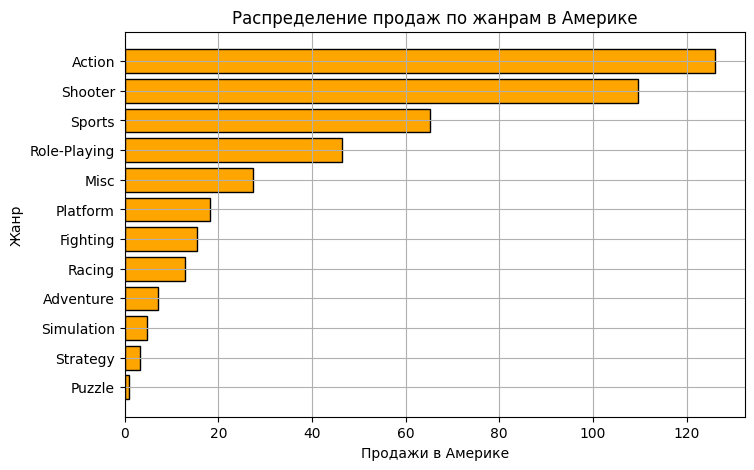

In [76]:
na_genre_pivot = na_genre_pivot.sort_values('na_sales', ascending=True)
create_bar(na_genre_pivot, 'na_sales', 'Продажи в Америке', 'Жанр', 'Распределение продаж по жанрам в Америке')

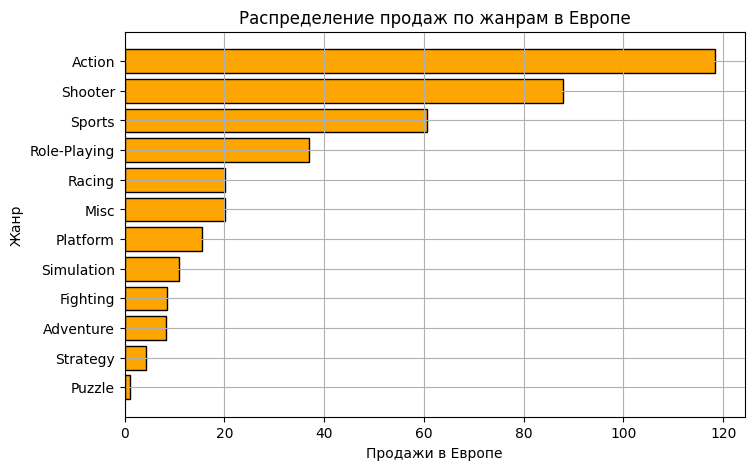

In [77]:
eu_genre_pivot = eu_genre_pivot.sort_values('eu_sales', ascending=True)
create_bar(eu_genre_pivot, 'eu_sales', 'Продажи в Европе', 'Жанр', 'Распределение продаж по жанрам в Европе')

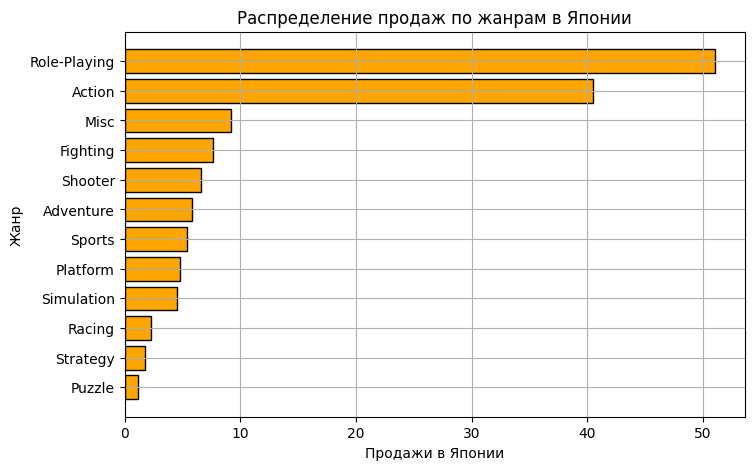

In [78]:
jp_genre_pivot = jp_genre_pivot.sort_values('jp_sales', ascending=True)
create_bar(jp_genre_pivot, 'jp_sales', 'Продажи в Японии', 'Жанр', 'Распределение продаж по жанрам в Японии')

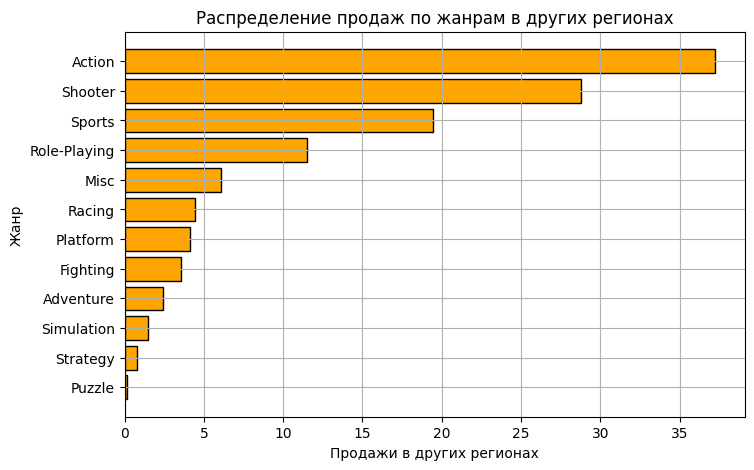

In [79]:
other_genre_pivot = other_genre_pivot.sort_values('other_sales', ascending=True)

create_bar(other_genre_pivot, 'other_sales', 'Продажи в других регионах', 'Жанр', 'Распределение продаж по жанрам в других регионах')

In [80]:
total_sales_by_genre = pd.concat([na_genre_pivot, eu_genre_pivot, jp_genre_pivot, other_genre_pivot], axis=1)
total_sales_by_genre.columns = ['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales']
total_sales_by_genre['Total Sales'] = total_sales_by_genre.sum(axis=1)
total_sales_by_genre.fillna(0, inplace=True)

total_sales_by_genre.sort_values(by='Total Sales', ascending=False)

,NA Sales,EU Sales,JP Sales,Other Sales,Total Sales
genre,,,,,
Action,126.11,118.38,40.49,37.24,322.22
Shooter,109.74,87.86,6.61,28.77,232.98
Sports,65.27,60.52,5.41,19.45,150.65
Role-Playing,46.40,36.97,51.04,11.48,145.89
Misc,27.49,20.04,9.20,6.09,62.82
Platform,18.14,15.58,4.79,4.12,42.63
Racing,12.96,20.19,2.30,4.44,39.89
Fighting,15.55,8.55,7.65,3.56,35.31
Adventure,7.14,8.25,5.82,2.43,23.64


1. Северная Америка:
 - Action - 126.11
 - Shooter - 109.74
 - Sports - 65.27
 - Role-Playing - 46.40
 - Misc - 27.49
2. Европа:
 - Action - 118.38
 - Shooter - 87.86
 - Sports - 60.52
 - Role-Playing - 36.97
 - Racing - 20.19
3. Япония:
 - Role-Playing - 51.04
 - Action - 40.49
 - Misc - 9.20
 - Fighting - 7.65
 - Shooter - 6.61
4. Другие регионы:
 - Action - 37.24
 - Shooter - 28.77
 - Sports - 19.45
 - Role-Playing - 11.48
 - Misc - 6.09

Топовые жанры:
 - Action: Самый популярный жанр во всех регионах. Популярность может быть обусловлена тем, что игры в этом жанре обычно предоставляют захватывающий геймплей, возможность проявить свои игровые навыки реакции, стратегии, скорости принятия реакции. Кроме того, игры в жанре Action часто имеют сильный сюжет, что делает их привлекательными для широкого круга игроков.
 - Shooter: Шутеры обычно предлагают быстрый и напряженный геймплей, что делает их привлекательными для игроков, которые ищут адреналин и конкуренцию. Кроме того, многие шутеры предлагают многопользовательский режим, что может способствовать повторным продажам и долговечности.
 - Sports: Спортивные игры часто имитируют популярные реальные спортивные события, что делает их привлекательными для фанатов этих видов спорта. Кроме того, они часто предлагают многопользовательский режим, что может увеличить их продолжительность жизни и продажи.
 - Role-Playing: Ролевые игры обычно предлагают глубокие сюжеты и сложные системы прокачки персонажей, что может привлечь игроков, которые ищут более вовлеченный и долгосрочный игровой опыт.


Выводы по регионам:

 - Северная Америка: В этом регионе наиболее популярными жанрами являются Action, Shooter и Sports. Это может отражать предпочтения американских игроков в отношении динамичного и конкурентного геймплея.

 - Европа: Европейские игроки также предпочитают игры в жанрах Action, Shooter и Sports. Однако в Европе также популярны гонки, что может отражать популярность автоспорта в этом регионе.

 - Япония: Японские игроки имеют отличные от западных предпочтения в жанрах. В Японии наиболее популярными жанрами являются Role-Playing и только потом Action. Также стоит отметить, что файтинг является одним из самых популярных жанров только в Японии среди всех регионов.

 - Другие регионы: В этих регионах наиболее популярными жанрами являются Action, Shooter и Sports, что схоже с предпочтениями в Северной Америке и Европе.

## Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [81]:
df['rating'].unique()

array(['E', 'n/a', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Рассмотрим каждый из доступных типов рейтинга ERSB:

1. **E (Everyone)**: Игры с этим рейтингом подходят для всех возрастов. Они могут содержать минимальное насилие, но оно всегда очень мягкое и не реалистичное.
2. **n/a (Not Applicable)**: Этот рейтинг означает, что игра еще не была оценена ESRB или не подлежит оценке.
3. **M (Mature)**: Игры с этим рейтингом предназначены для лиц старше 17 лет. Они могут содержать сильное насилие, грубый юмор, кровь или сексуальные сцены.
4. **T (Teen)**: Игры с этим рейтингом подходят для лиц от 13 лет и старше. Они могут содержать насилие, грубый язык, кровь или намеки на сексуальные сцены.
5. **E10+ (Everyone 10 and older)**: Игры с этим рейтингом подходят для лиц от 10 лет и старше. Они могут содержать больше мультяшного или мягкого насилия, или немного грубого юмора.
6. **K-A (Kids to Adults)**: Это устаревший рейтинг, который использовался ESRB до 1997 года. Он был заменен рейтингом “E”.
7. **AO (Adults Only)**: Игры с этим рейтингом предназначены только для взрослых старше 18 лет. Они могут содержать продолжительные сцены насилия или секса.
8. **EC (Early Childhood)**: Игры с этим рейтингом предназначены для детей от 3 лет и старше. Они не содержат материалов, которые родители могли бы считать неподходящими.
9. **RP (Rating Pending)**: Этот рейтинг используется для игр, которые еще не были оценены ESRB. Он обычно виден в рекламных и маркетинговых материалах до официального релиза игры.

In [82]:
na_esrb_pivot = create_pivot(na_platform, 'rating', 'na_sales', sort_by='na_sales')
eu_esrb_pivot = create_pivot(eu_platform, 'rating', 'eu_sales', sort_by='eu_sales')
jp_esrb_pivot = create_pivot(jp_platform, 'rating', 'jp_sales', sort_by='jp_sales')
other_esrb_pivot = create_pivot(other_platform, 'rating', 'other_sales', sort_by='other_sales')

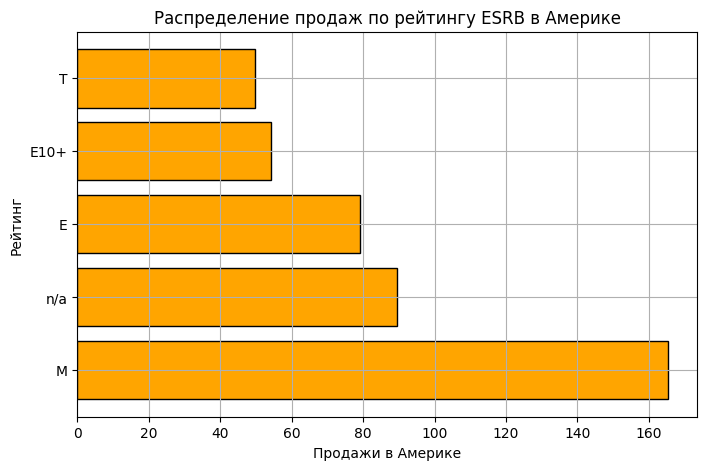

In [83]:
create_bar(na_esrb_pivot,
           'na_sales', 
           'Продажи в Америке', 
           'Рейтинг', 
           'Распределение продаж по рейтингу ESRB в Америке'
)

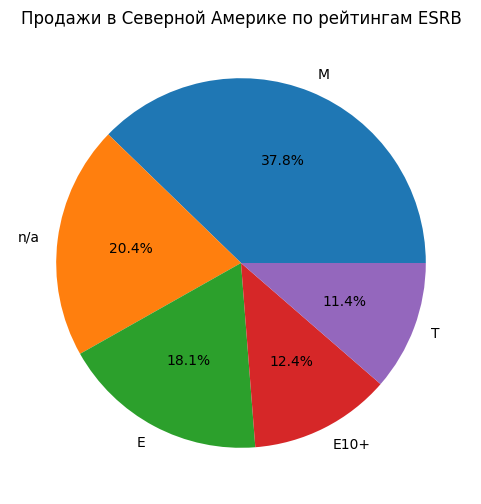

In [84]:
# создаем круговую диаграмму для продаж в Северной Америке
plt.figure(figsize=(6, 6))
na_esrb_pivot['na_sales'].plot.pie(autopct='%1.1f%%')
plt.title('Продажи в Северной Америке по рейтингам ESRB')
plt.ylabel('') 
plt.show()

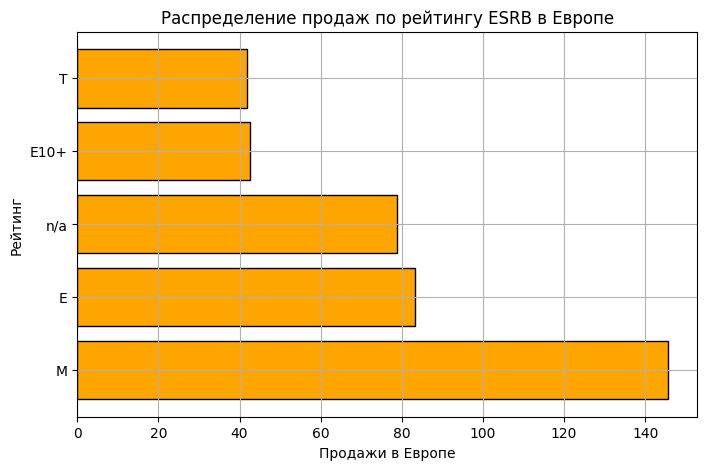

In [85]:
create_bar(eu_esrb_pivot, 
           'eu_sales', 
           'Продажи в Европе', 
           'Рейтинг', 
           'Распределение продаж по рейтингу ESRB в Европе'
)

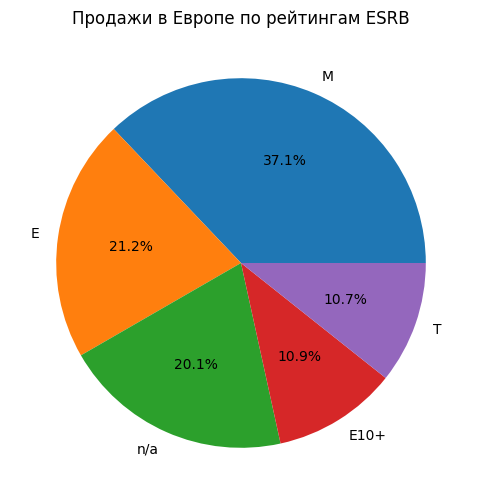

In [86]:
# создаем круговую диаграмму для продаж в Европе
plt.figure(figsize=(6, 6))
eu_esrb_pivot['eu_sales'].plot.pie(autopct='%1.1f%%')
plt.title('Продажи в Европе по рейтингам ESRB')
plt.ylabel('')
plt.show()

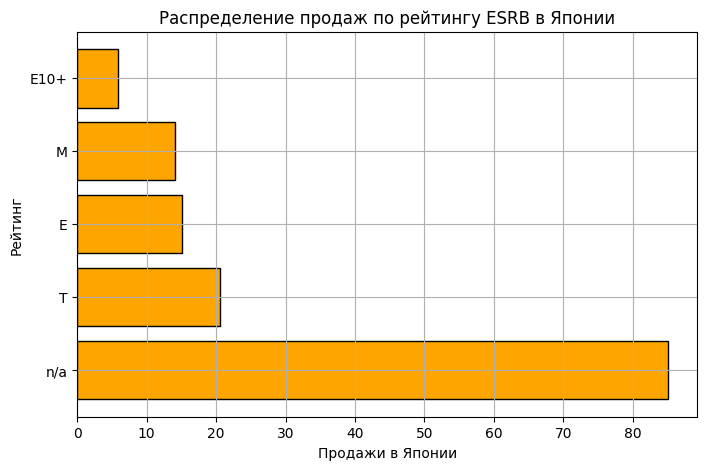

In [87]:
create_bar(jp_esrb_pivot, 
           'jp_sales', 
           'Продажи в Японии', 
           'Рейтинг', 
           'Распределение продаж по рейтингу ESRB в Японии'
)

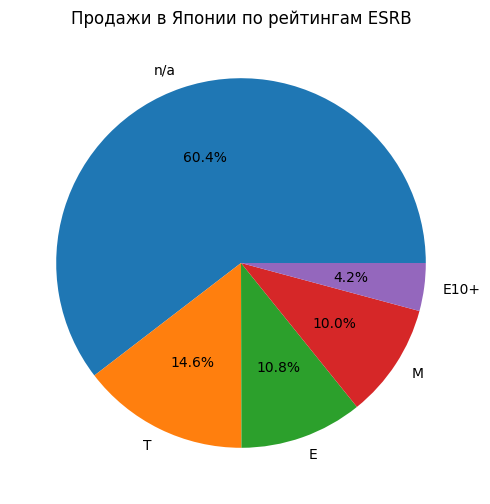

In [88]:
# создаем круговую диаграмму для продаж в Японии
plt.figure(figsize=(6, 6))
jp_esrb_pivot['jp_sales'].plot.pie(autopct='%1.1f%%')
plt.title('Продажи в Японии по рейтингам ESRB')
plt.ylabel('')
plt.show()

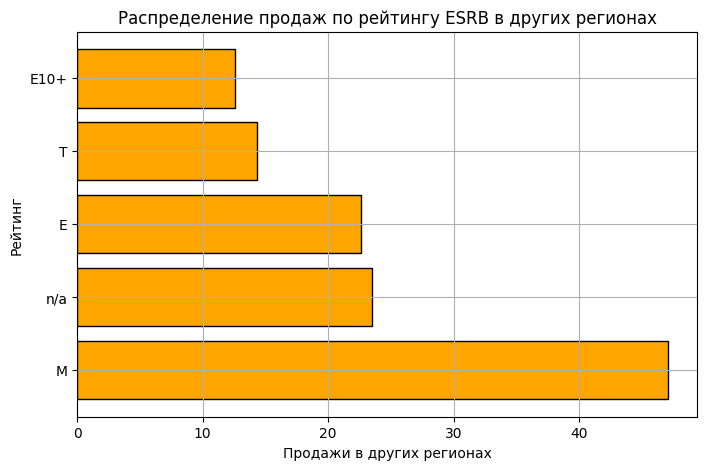

In [89]:
create_bar(other_esrb_pivot, 
           'other_sales', 
           'Продажи в других регионах', 
           'Рейтинг', 
           'Распределение продаж по рейтингу ESRB в других регионах'
)

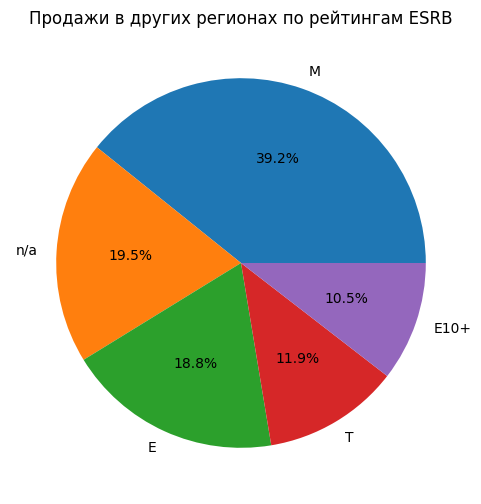

In [90]:
# создаем круговую диаграмму для продаж в других регионах
plt.figure(figsize=(6, 6))
other_esrb_pivot['other_sales'].plot.pie(autopct='%1.1f%%')
plt.title('Продажи в других регионах по рейтингам ESRB')
plt.ylabel('')
plt.show()

        NA Sales  EU Sales  JP Sales  Other Sales
rating                                           
M         165.27    145.57     14.11        47.08
n/a        89.42     78.91     85.05        23.46
E          79.05     83.36     15.14        22.61
E10+       54.24     42.69      5.89        12.57
T          49.79     41.95     20.59        14.29


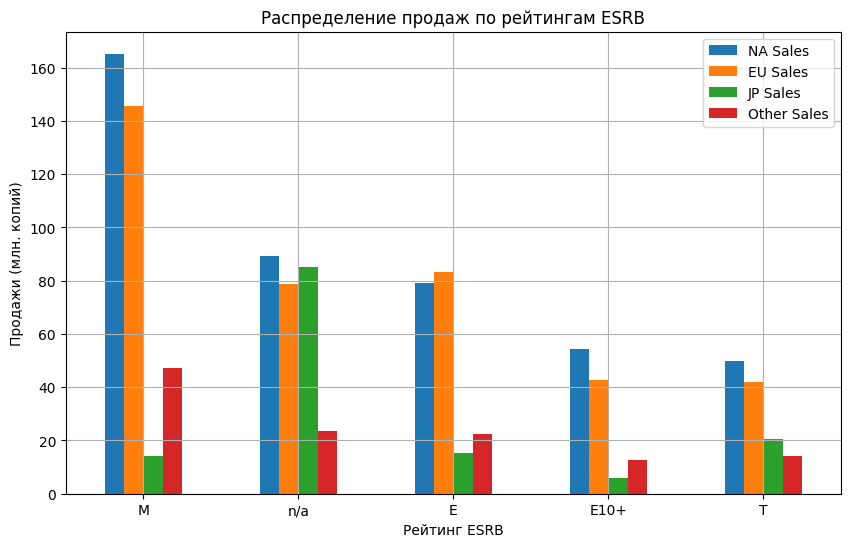

In [91]:
# создадим общую сводную таблицу
total_sales_by_rating = pd.concat([na_esrb_pivot, eu_esrb_pivot, jp_esrb_pivot, other_esrb_pivot], axis=1)
total_sales_by_rating.columns = ['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales']
total_sales_by_rating.fillna(0, inplace=True)

# выведем общую сводную таблицу
print(total_sales_by_rating)

# визуализируем распределение продаж по рейтингам ESRB
total_sales_by_rating.plot(kind='bar', figsize=(10, 6))
plt.title('Распределение продаж по рейтингам ESRB')
plt.xlabel('Рейтинг ESRB')
plt.xticks(rotation=0)
plt.ylabel('Продажи (млн. копий)')
plt.grid(True)
plt.show()

Столбчатая диаграмма показывает, что распределение между каждым из регионов (включая другие регионы) схоже между собой. Северная Америка, Европа, остальные регионы почти не отличаются друг от друга.

Исходя из того, что рейтинг ESRB применяется в продуктах Америки и Канады, то становится понятно, почему есть такое большое количество игр без рейтинга.

# Проверка гипотез

Необходимо проверить две гипотезы, и пояснить:
- как сформулирована нулевая и альтернативная гипотезы
- какой критерий применен для проверки гипотез

In [92]:
# напишем функцию, визуализирующую гистограмму плотности для каждого набора данных
def plot_distribution(data1, data2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data1, label=label1, fill=True)
    sns.kdeplot(data=data2, label=label2, fill=True)
    plt.title(title)
    plt.xlabel('Пользовательский рейтинг')
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()

## Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Воспользуемся исходными данными и составим нулевую и альтеративную гипотезы:
1. **Нулевая гипотеза H0**. Средние пользовательские рейтинги платформ Xbox One и PC равны
2. **Альтернативная гипотеза H1**. Средние пользовательские рейтинги платформ Xbox One и PC неравны.

Проверим гипотезы:

In [93]:
# Фильтруем данные для Xbox One, выбирай лишь те данные, где оценка выше или равна нулю
xbox_one_ratings = df_actual_sale[(df_actual_sale['platform'] == 'XOne') & (df_actual_sale['user_score'] >= 0)]['user_score']
pc_ratings = df_actual_sale[(df_actual_sale['platform'] == 'PC')  & (df_actual_sale['user_score'] >= 0)]['user_score']

# Расчитываем дисперсии средних пользовательских рейтингов Xbox One и PC
xbox_one_var = xbox_one_ratings.var()
pc_var = pc_ratings.var()

print(f' Дисперсия пользовательских рейтингов для Xbox One = {xbox_one_var}')
print(f' Дисперсия пользовательских рейтингов для PC = {pc_var}')
print(f' Количество пользовательских рейтингов для Xbox One = {xbox_one_ratings.count()}')
print(f' Количество пользовательских рейтингов для PC = {pc_ratings.count()}')


 Дисперсия пользовательских рейтингов для Xbox One = 190.69968429360694
 Дисперсия пользовательских рейтингов для PC = 304.8193134822167
 Количество пользовательских рейтингов для Xbox One = 182
 Количество пользовательских рейтингов для PC = 156


Дисперсии между двумя плафтормами достаточно близки как и количество пользователей друг к другу.

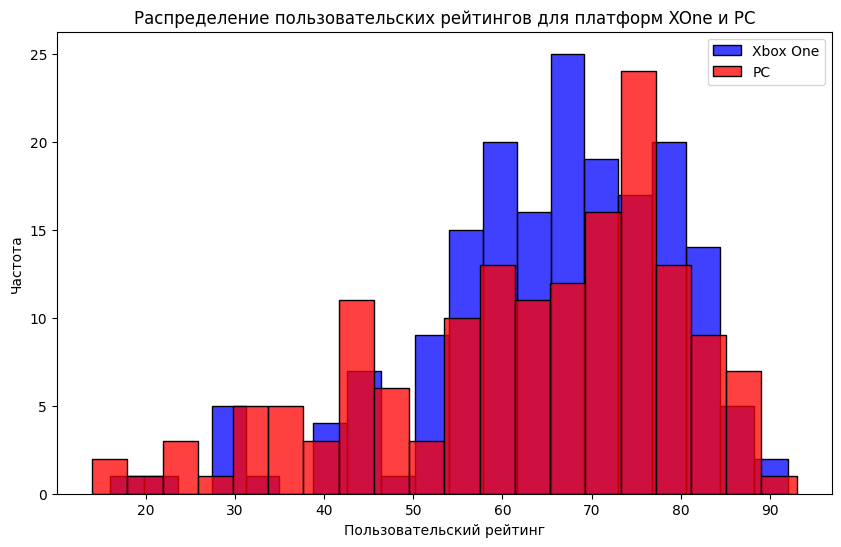

In [94]:
# Гистограмма с наложением
plt.figure(figsize=(10, 6))
sns.histplot(xbox_one_ratings, color='blue', label='Xbox One', bins = 20)
sns.histplot(pc_ratings, color='red', label='PC', bins = 20)
plt.title('Распределение пользовательских рейтингов для платформ XOne и PC')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Частота')
plt.legend()
plt.show()

Перед нами предоставлено два набора данных обозначенные красным и синим цветом, соответствующие жанрам PC и Xbox One.
Распределение пользовательских рейтингом выглядит нормальным, с пиками рейтингов ~60 и ~70 у Xbox One, 60 ~и ~75 у PC.

Дисперсии в 300 и 190 означают, что пользовательские рейтинги для PC имеют больший разброс по сравнению с Xbox One, количество пользовательских рейтингов 182 и 156 достаточно близко друг к другу.

Из имеющихся данных на визуализации видим нормальные распределения в жанрах Action и Sports. Для проверки гипотезы о равенстве средних пользовательских рейтингов платформ можно использовать t-тест Стьюдента

In [95]:
# задаём уровень статистической значимости
alpha = 0.05

# проведем статистический тест
results = st.ttest_ind(xbox_one_ratings, 
                       pc_ratings, 
                       equal_var=False, 
                       alternative='two-sided'
)

# выведем на экран получившееся p-значение
print(f'p-value: {results.pvalue}')

# сравним получившееся p-значение с уровнем стат. значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.17156613829336442
Не получилось отвергнуть нулевую гипотезу


При заданном уровне стат. значимости 0.05 мы провели t-тест. Полученное p-значение составило = 0.17. Так как p-значение выше уровня стат значимости, мы не можем отвергнуть нулевую гипотезу. Это означает, что на основании имеющихся данных, мы не можем сделать точный вывод о том, что средние пользовательские рейтинги для платформ Xbox One и PC отличаются. 

## Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные.

Воспользуемся исходными данными и составим нулевую и альтернативную гипотезы:
1. **Нулевая гипотеза H0**. Средние пользовательские рейтинги жанров Action и Sports равны
2. **Альтернативная гипотеза H1**. Средние пользовательские рейтинги жанров Action и Sports не равны.

Проверим гипотезы:

In [96]:
# Фильтруем данные для Action и Sports, выбирай лишь те данные, где оценка выше или равна нулю
action_rating = df_actual_sale[(df_actual_sale['genre'] == 'Action') & (df_actual_sale['user_score'] >= 0)]['user_score']
sports_rating = df_actual_sale[(df_actual_sale['genre'] == 'Sports') & (df_actual_sale['user_score'] >= 0)]['user_score']

# Расчитываем дисперсии средних пользовательских рейтингов Xbox One и PC
action_var = action_rating.var()
sports_var = sports_rating.var()

print(f' Дисперсия пользовательских рейтингов для жанра Action = {action_var}')
print(f' Дисперсия пользовательских рейтингов для жанра Sports = {sports_var}')
print(f' Количество пользовательских рейтингов для жанра Action = {action_rating.count()}')
print(f' Количество пользовательских рейтингов для жанра Sports = {sports_rating.count()}')


 Дисперсия пользовательских рейтингов для жанра Action = 177.1899083778261
 Дисперсия пользовательских рейтингов для жанра Sports = 318.0612814465409
 Количество пользовательских рейтингов для жанра Action = 390
 Количество пользовательских рейтингов для жанра Sports = 160


Дисперсии как и количество пользовательских рейтингов между двумя жанрами достаточно отличаются друг от друга.

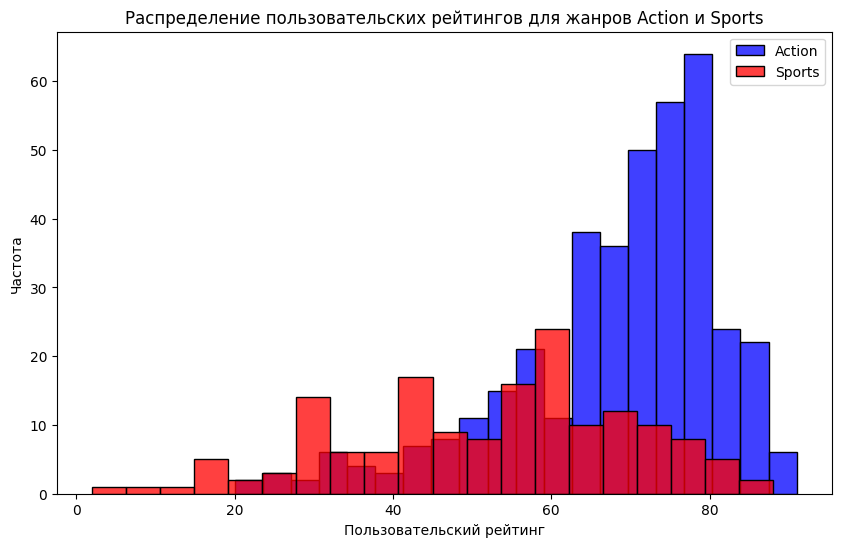

In [97]:
# Гистограмма с наложением
plt.figure(figsize=(10, 6))
sns.histplot(action_rating, color='blue', label='Action', bins=20)
sns.histplot(sports_rating, color='red', label='Sports', bins=20)
plt.title('Распределение пользовательских рейтингов для жанров Action и Sports')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Частота')
plt.legend()
plt.show()

На гистограмме представлены два набора данных, представленных разными цветами (красным и синим), которые соответствуют жанрам Action и Sports. Распределеения пользовательских рейтингов для обоих жанров выглядят нормальными. Для жанра Action пики рейтингов приходятся на 70-80, в то время как для Sports - 60.

Дисперсии пользовательских рейтингов для жанров Action и Sports отличаются, и количество пользовательских рейтингов также различается. Это означает, что пользовательские рейтинги для жанра Sports имеют больший разброс по сравнению с жанром Action.

Проведем t-тест для проверки гипотез:

In [98]:
# задаём уровень статистической значимости
alpha = 0.05

# проведем статистический тест
results = st.ttest_ind(action_rating, 
                       sports_rating, 
                       equal_var=False, 
                       alternative='two-sided'
)

# выведем на экран получившееся p-значение
print(f'p-value: {results.pvalue}')

# сравним получившееся p-значение с уровнем стат. значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.1834440653354691e-20
Отвергаем нулевую гипотезу


При заданном уровне стат. значимости 0.05 мы провели t-тест. Полученное p-значение составило значение, очень близкое к нулю. Так как p-значение ниже уровня стат значимости, опровергаем нулевую гипотезу. Это означает, что средние пользовательские рейтинги для жанров Action и Sports статистически значимо отличаются.

Вывод по гипотезам:

1. Формулирование нулевой и альтернативной гипотезы:
   - Нулевая гипотеза формулируется так, чтобы использовать знак равенства. Это означает, что нет разницы между сравниваемыми группами. В нашем случае, для первой гипотезы нлуевая гипотеза состоит в том, что средние пользовательские рейтинги платформ Xbox One и PC равны. Для второй гипотезы нулевая гипотеза состоит в том, что средние пользовательские рейтинги жанров Action и Sports равны.
   - Альтернативная гипотеза - то, что мы хотим доказать. В нашем случае, для первой гипотезы альтернативная гипотеза состоит в том, что средние пользовательские рейтинги платформ Xbox One и PC не равны. Для второй гипотезы альтернативная гипотеза состоит в том, что средние пользовательские рейтинги жанров Action и Sports не равны.
2. Критерии для проверки гипотез:
   - Мы выбрали t-тест Стьюдента для проверки наших гипотез. Этот тест используется для сравнения средних двух групп. Наши данные удовлетворяют требованиям t-теста: данные являются независимыми, распределения близки к нормальным (исходя из гистограмм), а также имеют приближенно равные дисперсии (из расчетов дисперсии).    

# Вывод

Исследование о продажах игр подведено к концу.
1. Взяв данные из датасета `games.csv` была проведена предобработка данных:
    - Обработаны столбцы с данными, приведены в необходимый формат
    - Заменены пропуски, заменены некоторые значения на временные для удобства работы с данными
    - Добавлен столбец о продажах `total_sales`
2. Исследовательский анализ данных по продажам игр, и выпущенным играм показал:
    - Первый серьезный прорыв начался в 1994-1995 годах, тогда количество выпускаемых игр увеличилось с 121 до 219.
    - С 2005 по 2009 год резко увеличились появления игр на рынке. Каждый год их количество увеличивалось все сильнее и сильнее. Рекордные значения оказались на 2008 и 2009 годах за Nintendo DS - удобной карманной игровой консолью - тогда вышло 1429 и 1427 игр.
    - С 2012 по 2016 год значения вернулись на старый уровень - количество игр стало в границах 500-600 в год. Можно сказать, что рынок откатился на 15 лет назад.
    - Полученные данные говорят нам о том, что платформы захватывали первые позиции по количеству продаж сменяя друг друга на протяжении всех лет. По 3, 4, 5 и даже 6 лет. 
    - Больше всех лет планки лидерства держали NES, PS, PS2 - по 6 лет каждый. Явный лидер как компания PlayStation - в общей сложности PS являлся лидером на протяжении 18 лет!
    - Выход третьей версии консоли PlayStation не повлиял на количество выпускаемых игр, но возможно повлиял на качество этих самых игр. Выше системные требования, выше ожидания от игроков, выше классы проектов и деньги вкладываемые в компании разработчиков.
    - Платформы-лидеры по количеству игр на платформе - Nintendo DS (2121), PS2 (2134)
    - Следом за ними идут PlayStation 1 (1173), PlayStation Portable (1195), Xbox 360 (1234), Wii (1286), PS3 (1306)
    - PS2 является платформой с самыми высокими общими продажами игр, достигающими 1247.28 млн долларов.
    - Топ 3 платформы являются PS4, PS3, Xbox One. В сумме три платформы заработали 655 млн. USD выручки, в то время как общая выручка по всем платформам составила 1.1 млрд. USD
3. Исследовательский анализ данных по влиянию отзывов на продажу, и общей информации по жанрам игр показал:
   - На PS4, PS3 и XOne отзывы критиков имеют большее влияние на продажи, чем отзывы пользователей.
   - На WiiU, отзывы пользователей и критиков имеют примерно одинаковое влияние на продажи.
   - На 3DS и X360, отзывы критиков имеют немного большее влияние на продажи, чем отзывы пользователей, хотя общая корреляция небольшая.
   - Самыми прибыльными жанрами являются Action (231.97 млн), Shooter (170.99 млн), Sports (115.06 млн) и Role-Playing (61.21 млн).
   - Самыми неприбыльными жанрами являются Puzzle (2.24 млн), Strategy (7.49 млн), Adventure (10.03 млн) и Simulation (12.07 млн).
   - Построены ящики с усами по глобальным продажам игр в разбивке по платформам.Разница в продажах между платформами значительна. Есть очень популярные игры, которые продаются годами и приносят много прибыли, но таких единицы. Много игр не смогли преодолеть порог в 400 тыс. долларов за выбранный период.
4. Самые популярные жанры, платформы и влияние рейтинга ESRB на продажи:
   - Самая популярная платформа в мире - PS4
   - Самые большие объемы по продажам приходятся на Европу и Северную Америку. Продажи в Японии значительно ниже чем во всех других регионах.
   - Самый популярный жанр игр - Action.
   - Самые прибыльные по медианными продажами - Shooter (0.45 млн) и Sports (0.24 млн). Жанры с самыми низкими медианными продажами - Puzzle (0.06 млн) и Adventure (0.03 млн).
   - Жанр Action несмотря на самые высокие общие продажи (322.22 млн), имеет более низкую медиану (0.11 млн) по сравнению с жанрами Shooter и Sports. Это может указывать на большую вариативность продаж в этом жанре, где некоторые игры имеют очень высокие продажи, в то время как другие - низкие.
   - распределение по рейтингу ERSB между каждым из регионов (включая "другие" регионы) очень схоже между собой (фигуры выглядят практически одинаково). Северная Америка, Европа, "другие" регионы вообще почти не отличаются друг от друга.
5. Были проверены две гипотезы, касательно равенства средних пользовательских рейтингов платформ Xbox One и PC, а также касательно неравенства средних пользовательских рейтингов жанров Action и Sport
   - В первом случае не получилось отвергнуть нулевую гипотезу. Вероятно, что средние пользовательские между двумя платформами очень близки друг к другу.
   - Во втором случае нулевая гипотеза была отвергнута. Проведенный t-тест для показал статистически значимое различие между ними. Можно утверждать, что средние пользовательские рейтинги для игр в жанрах Action и Sports отличаются между собой.

# Рекомендации на 2017 год

1. Платформы: Стоит сосредоточиться на платформах PS4 и Xbox One, так как они являются самыми популярными в настоящее время. Однако, не стоит забывать и о Nintendo 3DS, особенно для японского рынка.
2. Жанры: Action, Shooter, Sports являются самыми популярными жанрами, поэтому стоит рассмотреть возможность выпуска игр в этих жанрах. Игры с многопользовательским режимом могут просуществовать намного дольше игр, без совместной игры.
3. Географические особенности: Стоит учесть предпочтения пользователей в разных регионах.
   - В Северной Америке самые популярные жанры это Action, Shooter и Sports. А самые популярные платформы - PS4, Xbox One, Xbox 360. Стоит учитывать, что в Северной Америке идет постоянная борьба и серьезная конкуренция между Xbox и PS.
   - В Европе самые популярные жанры также Action, Shooter и Sports. В Европе стоит делать упор на PlayStation - ведь в топ-2 находятся PS4 и PS3.
   - В Японии самые популярные жанры Action, Role-Playing и Shooter. Там популярны Nintendo 3DS, PS3 и PS4. Выпускать игру на Xbox в этом регионе может быть рискованно. 
   - Во всём остальном мире идет такая же борьба как и в Америке - Xbox против PS.
5. Рейтинг ESRB: Игры с рейтингом “E” (для всех) и “M” (для взрослых) имеют самые высокие продажи. Однако, стоит учесть, что игры с рейтингом “M” могут быть недоступны для младшей аудитории.